In [311]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import numpy as np

from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors

In [312]:
df = pd.read_csv("data_skor_2.csv")

In [313]:
df2 = df.copy()

In [314]:
df.head()

,Desa,Persentase gaji di atas UMK,Persentase sumber listrik PLN,Persentase air bersih PDAM,"Persentase bangunan rumah bukan ""rumah kecil""",Rata-rata luas lahan (Ha),Rata-rata produksi pertanian (ton),Rata-rata tangkapan ikan (Kg),Persentase petani membeli pupuk,Persentase petani membeli pestisida,Persentase petani menyewa alat pertanian,Persentase kepemilikan ternak,Persentase pembelian obat,Persentase balita sering diperiksa di Posyandu,Persentase terdapat anggota keluarga yang sering sakit,Persentase mendapat bantuan dari pemerintah,Persentase tidak membeli obat,Persentase keluarga sehat,Persentase kemandirian perekonomian desa
0,Balauring,20.000000,100.000000,76.666667,80.000000,10.350000,0.496667,9.300000,66.666667,11.111111,0.000000,66.666667,10.000000,100.000000,33.333333,70.000000,90.000000,66.666667,30.000000
1,Benihading,66.666667,100.000000,0.000000,50.000000,1.156233,0.592959,0.000000,0.000000,7.407407,0.000000,100.000000,20.000000,100.000000,63.333333,83.333333,80.000000,36.666667,16.666667
2,Bour,21.428571,96.428571,0.000000,57.142857,0.720125,2.130036,0.821429,50.000000,83.333333,41.666667,92.857143,14.285714,100.000000,35.714286,85.714286,85.714286,64.285714,14.285714
3,Dikesare,6.666667,100.000000,0.000000,66.666667,0.205933,20.127110,7.666667,0.000000,0.000000,0.000000,76.666667,3.333333,95.454545,20.000000,76.666667,96.666667,80.000000,23.333333
4,Duawutun,20.000000,100.000000,100.000000,80.000000,0.928333,5.889333,1.233333,0.000000,0.000000,0.000000,66.666667,0.000000,100.000000,10.000000,50.000000,100.000000,90.000000,50.000000


In [315]:
df.drop(columns=['Persentase balita sering diperiksa di Posyandu'], inplace=True)
df.drop(columns=['Persentase pembelian obat'], inplace=True)
df.drop(columns=['Persentase mendapat bantuan dari pemerintah'], inplace=True)
df.drop(columns=['Persentase terdapat anggota keluarga yang sering sakit'], inplace=True)

In [316]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 15 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Desa                                           29 non-null     object 
 1   Persentase gaji di atas UMK                    29 non-null     float64
 2   Persentase sumber listrik PLN                  29 non-null     float64
 3   Persentase air bersih PDAM                     29 non-null     float64
 4   Persentase bangunan rumah bukan "rumah kecil"  29 non-null     float64
 5   Rata-rata luas lahan (Ha)                      29 non-null     float64
 6   Rata-rata produksi pertanian (ton)             29 non-null     float64
 7   Rata-rata tangkapan ikan (Kg)                  29 non-null     float64
 8   Persentase petani membeli pupuk                29 non-null     float64
 9   Persentase petani membeli pestisida            29 non-nu

In [317]:
df.isna().sum()

Desa                                             0
Persentase gaji di atas UMK                      0
Persentase sumber listrik PLN                    0
Persentase air bersih PDAM                       0
Persentase bangunan rumah bukan "rumah kecil"    0
Rata-rata luas lahan (Ha)                        0
Rata-rata produksi pertanian (ton)               0
Rata-rata tangkapan ikan (Kg)                    0
Persentase petani membeli pupuk                  0
Persentase petani membeli pestisida              0
Persentase petani menyewa alat pertanian         0
Persentase kepemilikan ternak                    0
Persentase tidak membeli obat                    0
Persentase keluarga sehat                        0
Persentase kemandirian perekonomian desa         0
dtype: int64

## analisis distribusi

In [318]:
#memisahkan data numerik dan kategorik
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

In [319]:
df[numerical_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
Persentase gaji di atas UMK,29.0,23.094844,14.946905,3.333333,10.000000,21.428571,32.258065,66.666667
Persentase sumber listrik PLN,29.0,98.853488,2.390438,90.000000,100.000000,100.000000,100.000000,100.000000
Persentase air bersih PDAM,29.0,47.823508,48.804427,0.000000,0.000000,16.666667,100.000000,100.000000
"Persentase bangunan rumah bukan ""rumah kecil""",29.0,67.276354,14.929311,16.666667,63.333333,66.666667,76.666667,96.551724
Rata-rata luas lahan (Ha),29.0,17.634582,35.684787,0.205933,0.552516,1.061917,10.350000,138.232790
Rata-rata produksi pertanian (ton),29.0,10.875879,15.420498,0.028387,0.496667,2.650610,14.839667,57.655900
Rata-rata tangkapan ikan (Kg),29.0,1.297650,2.203005,0.000000,0.000000,0.433333,1.233333,9.300000
Persentase petani membeli pupuk,29.0,17.371751,30.234160,0.000000,0.000000,0.000000,12.500000,100.000000
Persentase petani membeli pestisida,29.0,30.467098,31.440932,0.000000,0.000000,28.571429,52.173913,100.000000
Persentase petani menyewa alat pertanian,29.0,7.547862,14.553425,0.000000,0.000000,0.000000,10.000000,66.666667


In [320]:
cols = 3
rows = math.ceil(len(numerical_cols) / cols)

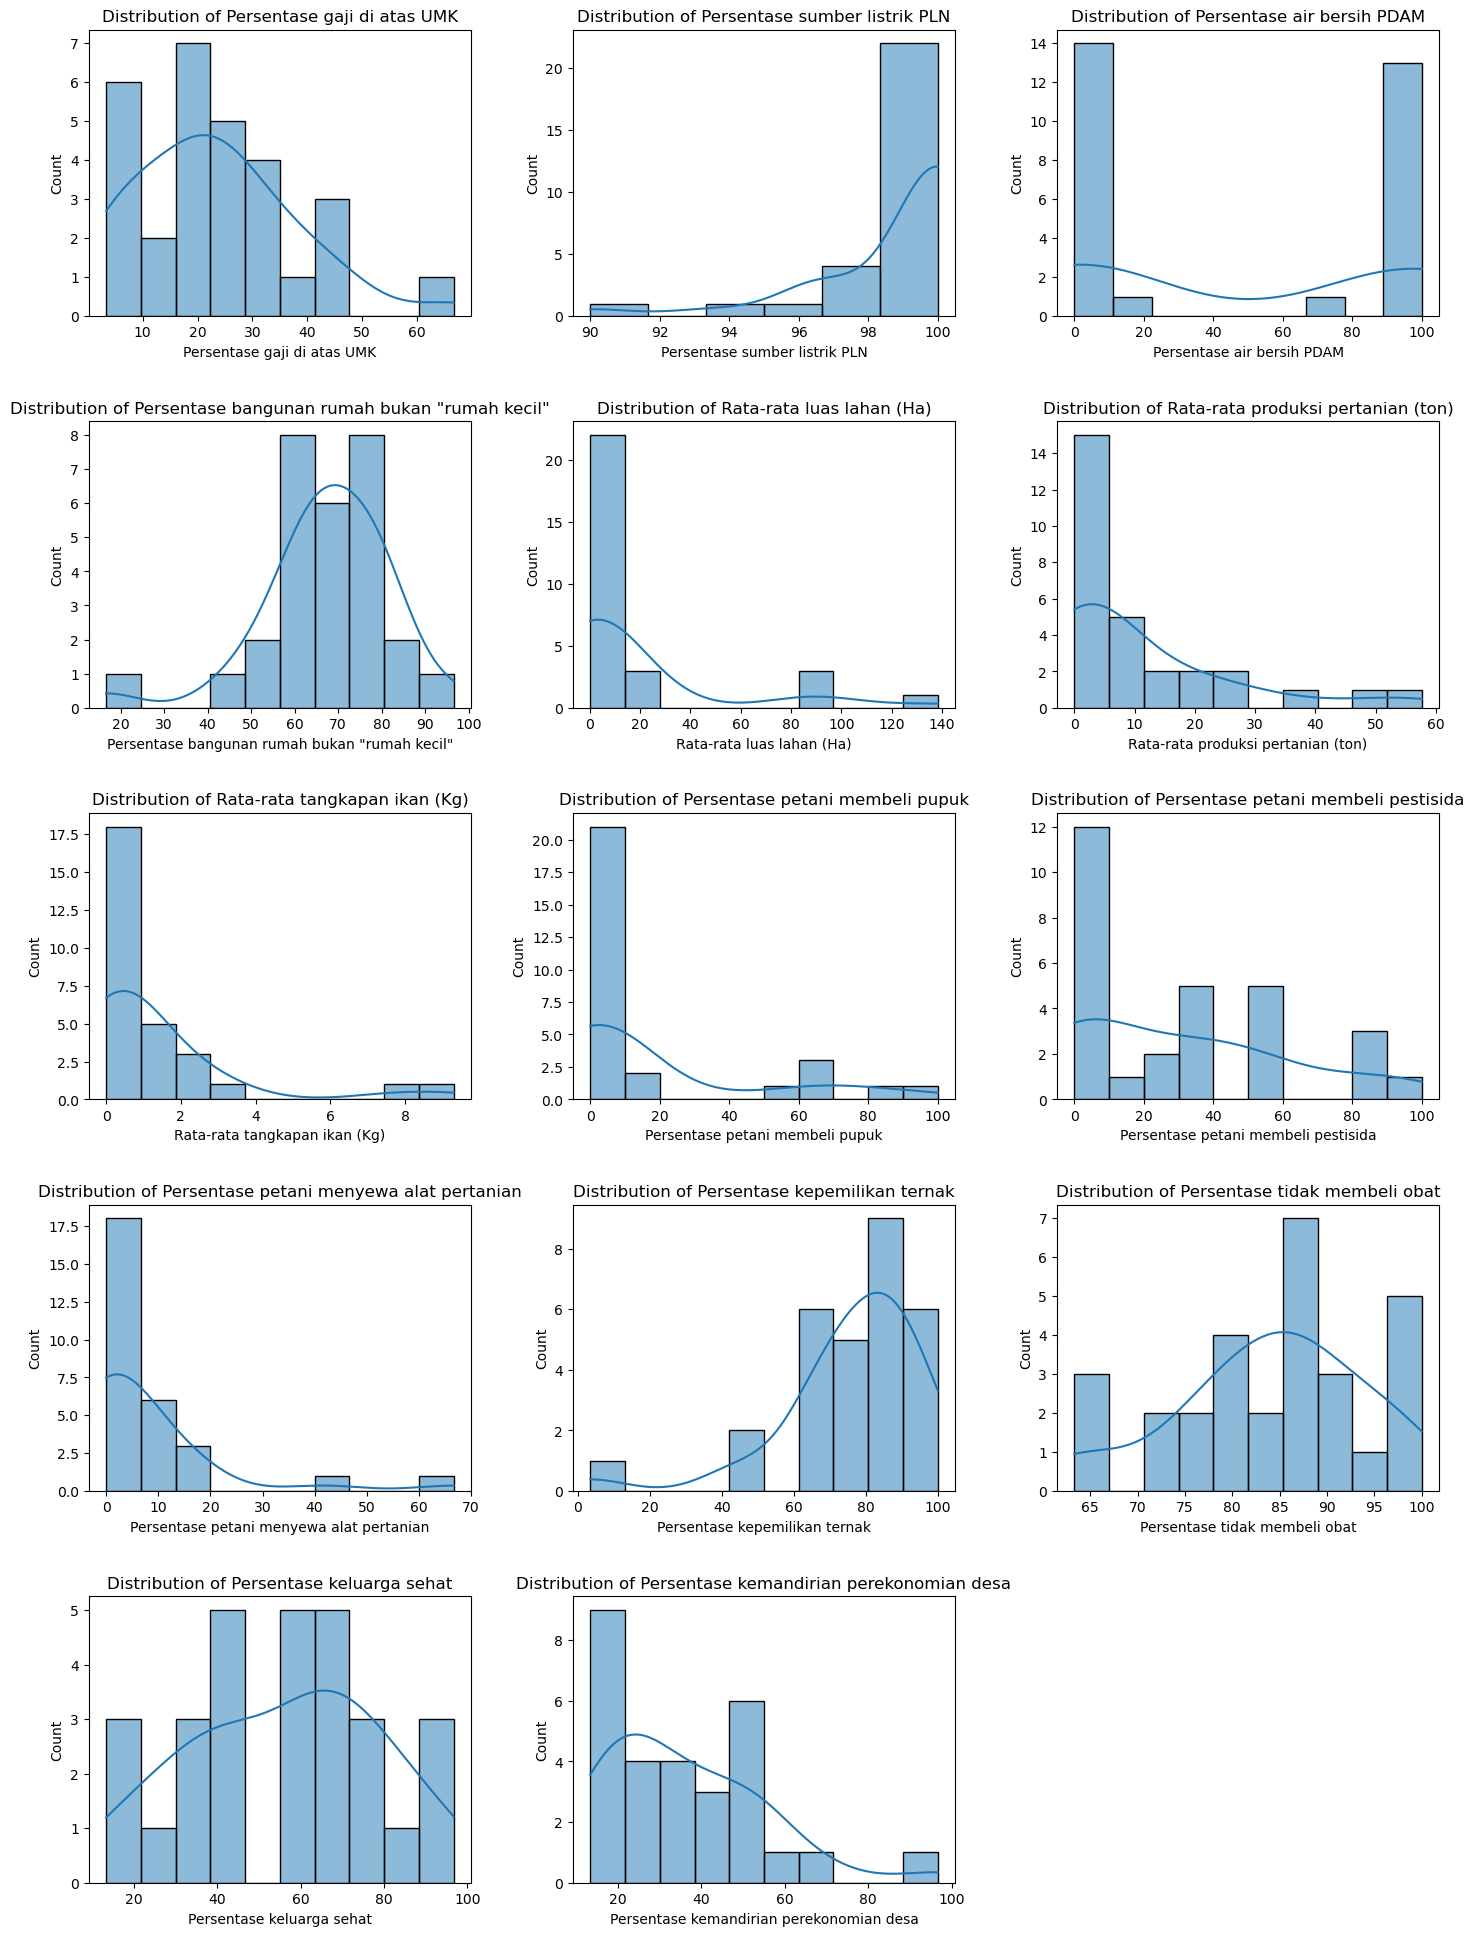

In [321]:
fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 4))
axes = axes.flatten()
for i, col in enumerate(numerical_cols):
    sns.histplot(df[col], kde=True, bins=min(10, df[col].nunique()), ax=axes[i])
    axes[i].set_title(f"Distribution of {col}")
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])
plt.tight_layout(pad=3)
plt.show()

In [322]:
core_features = [
    "Persentase air bersih PDAM",
    "Persentase petani membeli pupuk",
    "Persentase petani membeli pestisida",
    "Persentase bangunan rumah bukan \"rumah kecil\""
]

optional_features = [
    "Persentase keluarga sehat",
    "Persentase kemandirian perekonomian desa",
    "Persentase kepemilikan ternak"
]

excluded_features = [
    "Persentase sumber listrik PLN",
    "Persentase gaji di atas UMK",
    "Rata-rata luas lahan (Ha)",
    "Rata-rata produksi pertanian (ton)",
    "Rata-rata tangkapan ikan (Kg)",
    "Persentase petani menyewa alat pertanian",
    "Persentase tidak membeli obat"
]


In [323]:
df = df[core_features]

In [324]:
df["Desa"] = df2["Desa"]

In [325]:
df

,Persentase air bersih PDAM,Persentase petani membeli pupuk,Persentase petani membeli pestisida,"Persentase bangunan rumah bukan ""rumah kecil""",Desa
0,76.666667,66.666667,11.111111,80.000000,Balauring
1,0.000000,0.000000,7.407407,50.000000,Benihading
2,0.000000,50.000000,83.333333,57.142857,Bour
3,0.000000,0.000000,0.000000,66.666667,Dikesare
4,100.000000,0.000000,0.000000,80.000000,Duawutun
5,16.666667,0.000000,0.000000,63.333333,Dulitukan
6,0.000000,85.714286,57.142857,70.000000,Hoelea I
7,0.000000,7.142857,53.571429,76.666667,Ile Kimok
8,0.000000,100.000000,100.000000,70.000000,Kalikur
9,100.000000,0.000000,33.333333,70.967742,Katakeja


In [326]:
#memisahkan data numerik dan kategorik
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

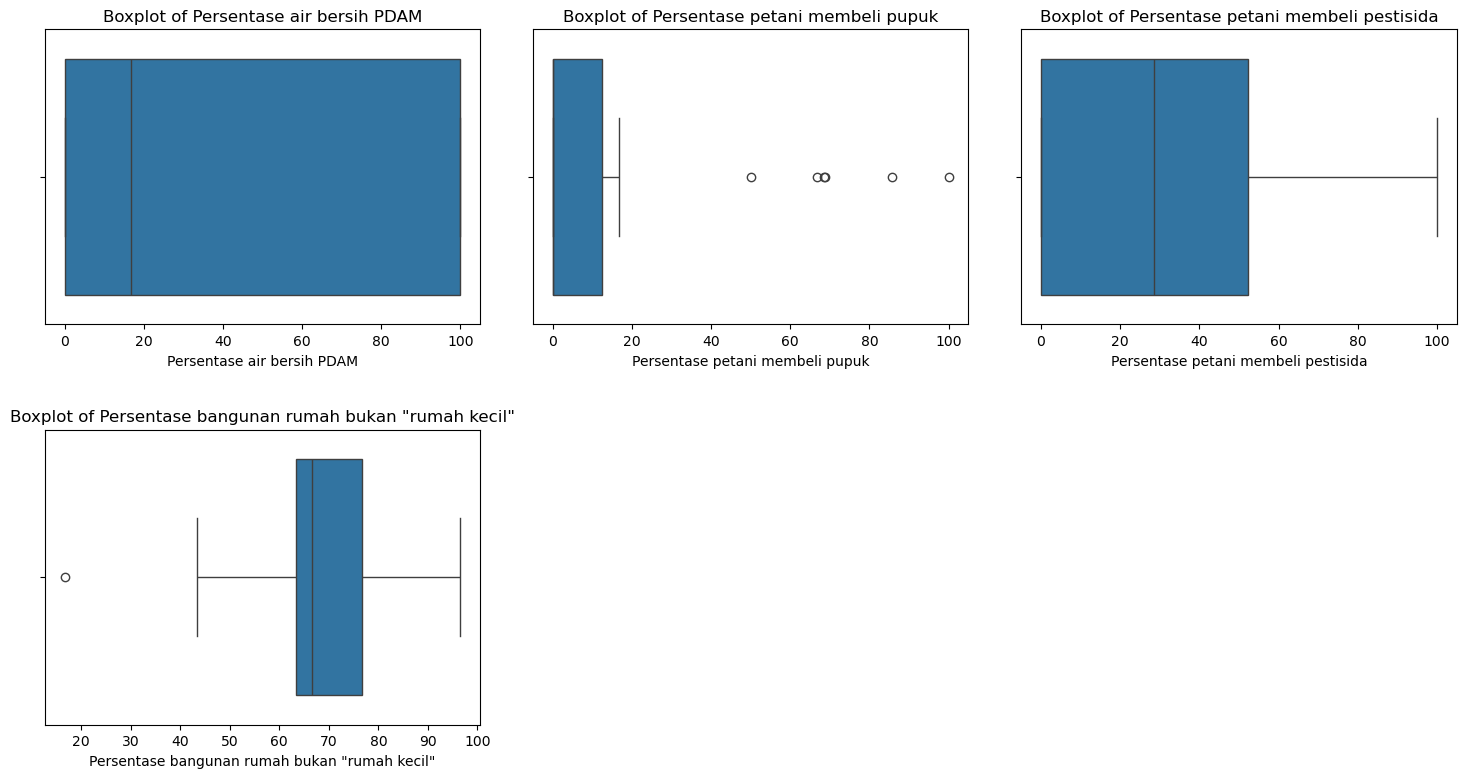

In [327]:
fig, axes = plt.subplots(rows, cols, figsize=(15, rows*4))
axes = axes.flatten()
for i, col in enumerate(numerical_cols):
    sns.boxplot(x=df[col], ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}')
    axes[i].set_xlabel(col)
for j in range(i+1, len(axes)): fig.delaxes(axes[j])
plt.tight_layout(pad=3); plt.show()

## normalisasi

In [328]:
#Normalisasi
scaler = MinMaxScaler()
df_normalized = df.copy()
df_normalized[numerical_cols] = scaler.fit_transform(df[numerical_cols])

In [329]:
df_normalized

,Persentase air bersih PDAM,Persentase petani membeli pupuk,Persentase petani membeli pestisida,"Persentase bangunan rumah bukan ""rumah kecil""",Desa
0,0.766667,0.666667,0.111111,0.792806,Balauring
1,0.000000,0.000000,0.074074,0.417266,Benihading
2,0.000000,0.500000,0.833333,0.506680,Bour
3,0.000000,0.000000,0.000000,0.625899,Dikesare
4,1.000000,0.000000,0.000000,0.792806,Duawutun
5,0.166667,0.000000,0.000000,0.584173,Dulitukan
6,0.000000,0.857143,0.571429,0.667626,Hoelea I
7,0.000000,0.071429,0.535714,0.751079,Ile Kimok
8,0.000000,1.000000,1.000000,0.667626,Kalikur
9,1.000000,0.000000,0.333333,0.679740,Katakeja


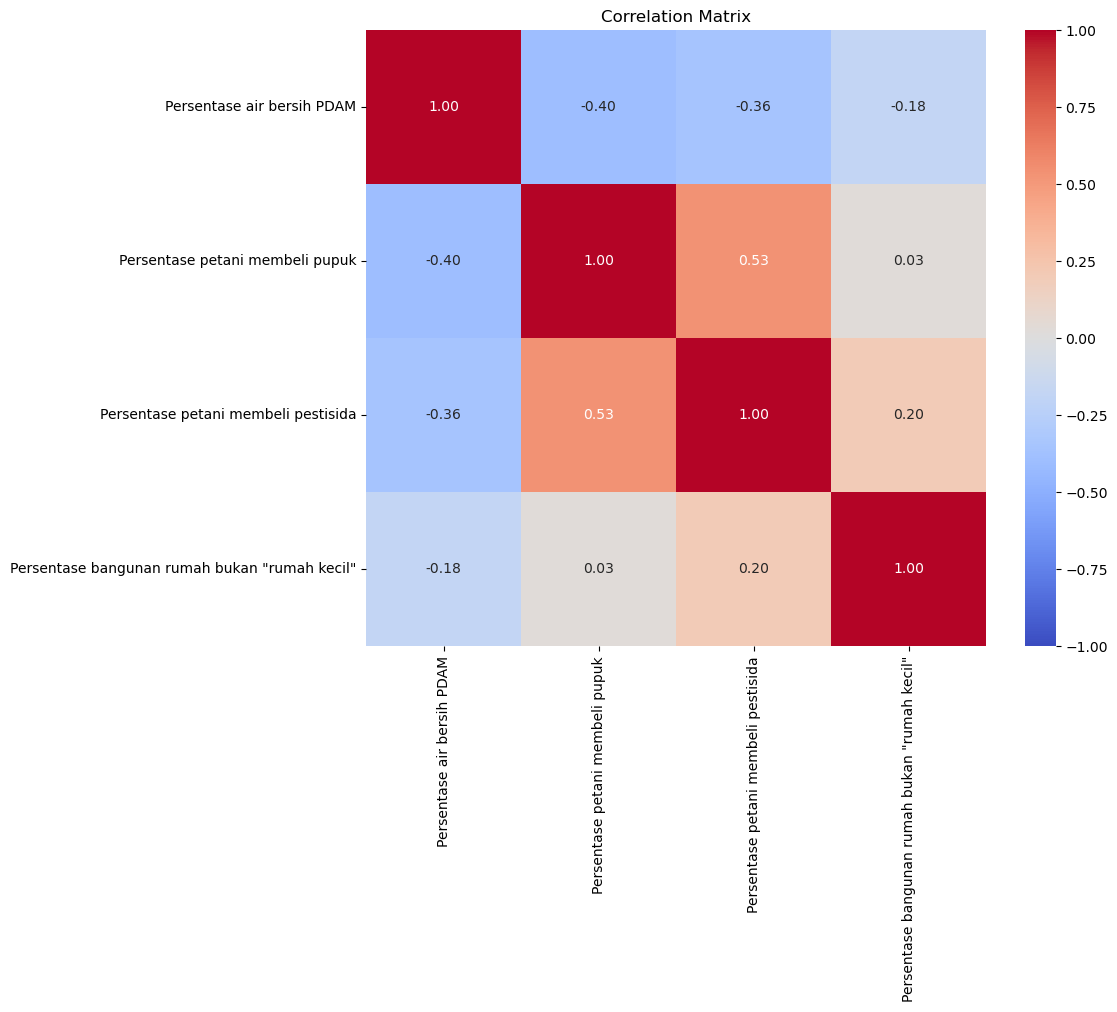

In [330]:
plt.figure(figsize=(10,8))
corr = df[numerical_cols].corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

In [331]:
# buang korelasi diri sendiri
np.fill_diagonal(corr.values, np.nan)

summary = pd.DataFrame({
    "sum_corr": corr.sum(axis=1),
    "mean_corr": corr.mean(axis=1)
})

summary


,sum_corr,mean_corr
Persentase air bersih PDAM,-0.945791,-0.315264
Persentase petani membeli pupuk,0.158009,0.052670
Persentase petani membeli pestisida,0.376405,0.125468
"Persentase bangunan rumah bukan ""rumah kecil""",0.041380,0.013793


In [332]:
df[numerical_cols].describe().T[["mean", "std", "min", "max"]]


,mean,std,min,max
Persentase air bersih PDAM,47.823508,48.804427,0.000000,100.000000
Persentase petani membeli pupuk,17.371751,30.234160,0.000000,100.000000
Persentase petani membeli pestisida,30.467098,31.440932,0.000000,100.000000
"Persentase bangunan rumah bukan ""rumah kecil""",67.276354,14.929311,16.666667,96.551724


In [333]:
from scipy.stats import entropy

entropy_scores = {}

for col in numerical_cols:
    hist = np.histogram(df[col].dropna(), bins=10)[0]
    entropy_scores[col] = entropy(hist + 1e-9)

pd.Series(entropy_scores).sort_values(ascending=False)


Persentase bangunan rumah bukan "rumah kecil"    1.753702
Persentase petani membeli pestisida              1.622627
Persentase petani membeli pupuk                  1.001189
Persentase air bersih PDAM                       0.943463
dtype: float64

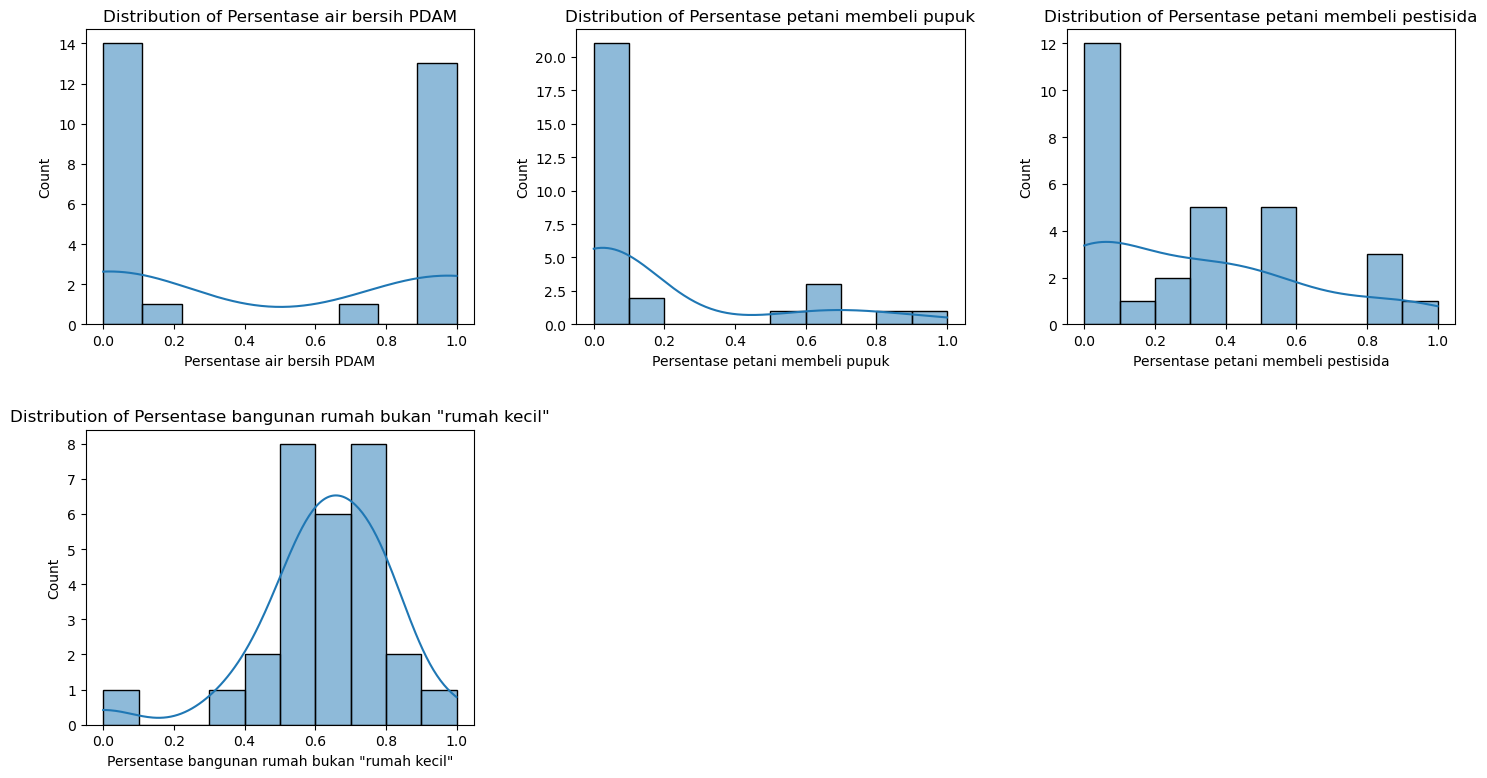

In [334]:
fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 4))
axes = axes.flatten()
for i, col in enumerate(numerical_cols):
    sns.histplot(df_normalized[col], kde=True, bins=min(10, df_normalized[col].nunique()), ax=axes[i])
    axes[i].set_title(f"Distribution of {col}")
for j in range(i+1, len(axes)): fig.delaxes(axes[j])
plt.tight_layout(pad=3); plt.show()

In [335]:
df_normalized.to_csv("df_normalized.csv", index=False)

## pembangunan model clustering

In [336]:
df_plot = df.copy()

In [337]:
df_num_normalized = df_normalized.select_dtypes(include=['number']).copy()

### k means

C:\Users\halid\anaconda3\envs\main-ds\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\halid\anaconda3\envs\main-ds\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\halid\anaconda3\envs\main-ds\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\halid\anaconda3\envs\main-ds\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarn

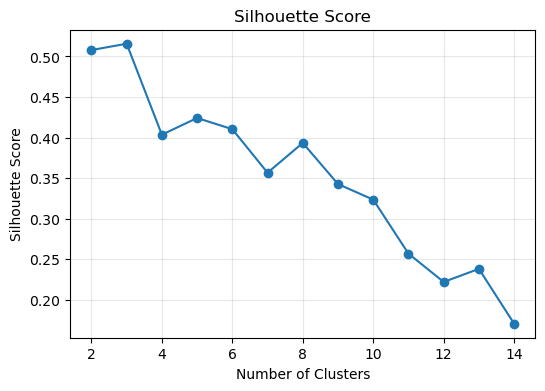

In [338]:
silhouette_scores = []
for k in range(2, 15):
    km = KMeans(n_clusters=k, init='k-means++', random_state=42)
    km.fit(df_num_normalized)
    silhouette_scores.append(silhouette_score(df_num_normalized, km.labels_))

plt.figure(figsize=(6,4))
plt.plot(range(2,15), silhouette_scores, marker='o')
plt.title('Silhouette Score')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.grid(alpha=.3)
plt.show()

In [339]:
# melatih model

model_kmeans_orig = KMeans (
    n_clusters=3,
    init='k-means++',
    random_state=42
)
model_kmeans_orig.fit(df_num_normalized)
kmeans_labels_original = model_kmeans_orig.labels_
silhouette_score(df_num_normalized, kmeans_labels_original)

C:\Users\halid\anaconda3\envs\main-ds\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


0.5157313909840867

In [340]:
df_plot = df_plot.loc[df_num_normalized.index]
df_plot["KM_Cluster"] = pd.Categorical(kmeans_labels_original, categories=[0,1,2])

In [341]:
df_plot

,Persentase air bersih PDAM,Persentase petani membeli pupuk,Persentase petani membeli pestisida,"Persentase bangunan rumah bukan ""rumah kecil""",Desa,KM_Cluster
0,76.666667,66.666667,11.111111,80.000000,Balauring,0
1,0.000000,0.000000,7.407407,50.000000,Benihading,1
2,0.000000,50.000000,83.333333,57.142857,Bour,2
3,0.000000,0.000000,0.000000,66.666667,Dikesare,1
4,100.000000,0.000000,0.000000,80.000000,Duawutun,0
5,16.666667,0.000000,0.000000,63.333333,Dulitukan,1
6,0.000000,85.714286,57.142857,70.000000,Hoelea I,2
7,0.000000,7.142857,53.571429,76.666667,Ile Kimok,1
8,0.000000,100.000000,100.000000,70.000000,Kalikur,2
9,100.000000,0.000000,33.333333,70.967742,Katakeja,0


In [342]:
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(df_num_normalized)

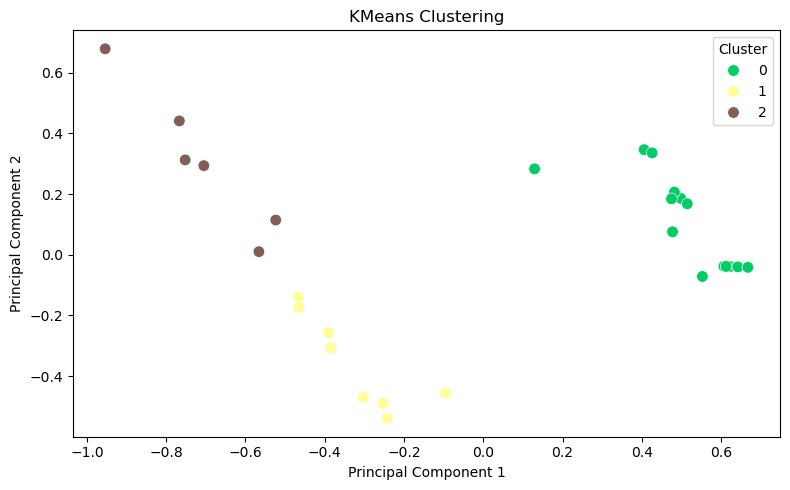

In [343]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=df_plot["KM_Cluster"],
                palette="terrain", s=70, edgecolor="white", linewidth=.5)
plt.title('KMeans Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster', loc='best', frameon=True)
plt.tight_layout()
plt.show()

### hierarchical clustering

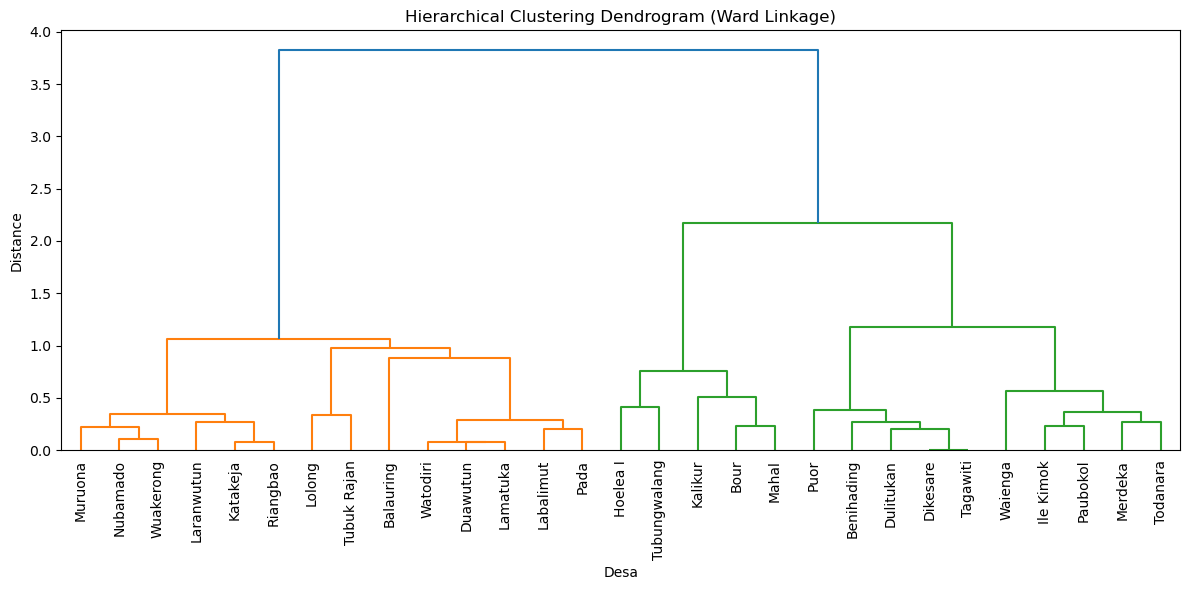

In [344]:
desa = df["Desa"]

# linkage: 'ward' cocok untuk data numerik
Z_orig = linkage(df_num_normalized, method='ward')

plt.figure(figsize=(12,6))
dendrogram(Z_orig, labels=desa.values, leaf_rotation=90)
plt.title("Hierarchical Clustering Dendrogram (Ward Linkage)")
plt.xlabel("Desa")
plt.ylabel("Distance")
plt.tight_layout()
plt.show()

In [345]:
hc_labels_original = fcluster(Z_orig, 2, criterion="maxclust")
df_plot["HC_Cluster"] = pd.Categorical(hc_labels_original)

In [346]:
df_plot

,Persentase air bersih PDAM,Persentase petani membeli pupuk,Persentase petani membeli pestisida,"Persentase bangunan rumah bukan ""rumah kecil""",Desa,KM_Cluster,HC_Cluster
0,76.666667,66.666667,11.111111,80.000000,Balauring,0,1
1,0.000000,0.000000,7.407407,50.000000,Benihading,1,2
2,0.000000,50.000000,83.333333,57.142857,Bour,2,2
3,0.000000,0.000000,0.000000,66.666667,Dikesare,1,2
4,100.000000,0.000000,0.000000,80.000000,Duawutun,0,1
5,16.666667,0.000000,0.000000,63.333333,Dulitukan,1,2
6,0.000000,85.714286,57.142857,70.000000,Hoelea I,2,2
7,0.000000,7.142857,53.571429,76.666667,Ile Kimok,1,2
8,0.000000,100.000000,100.000000,70.000000,Kalikur,2,2
9,100.000000,0.000000,33.333333,70.967742,Katakeja,0,1


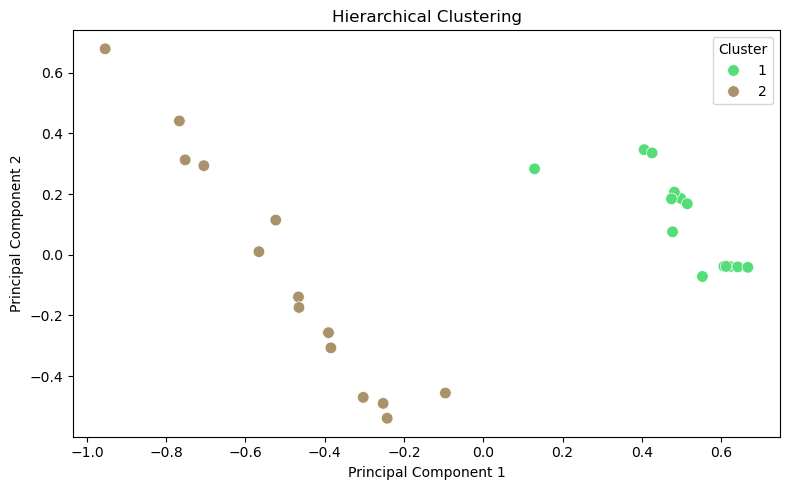

In [347]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=df_plot["HC_Cluster"],
                palette="terrain", s=70, edgecolor="white", linewidth=.5)
plt.title('Hierarchical Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster', loc='best', frameon=True)
plt.tight_layout()
plt.show()

### dbscan

#### min samples = 2

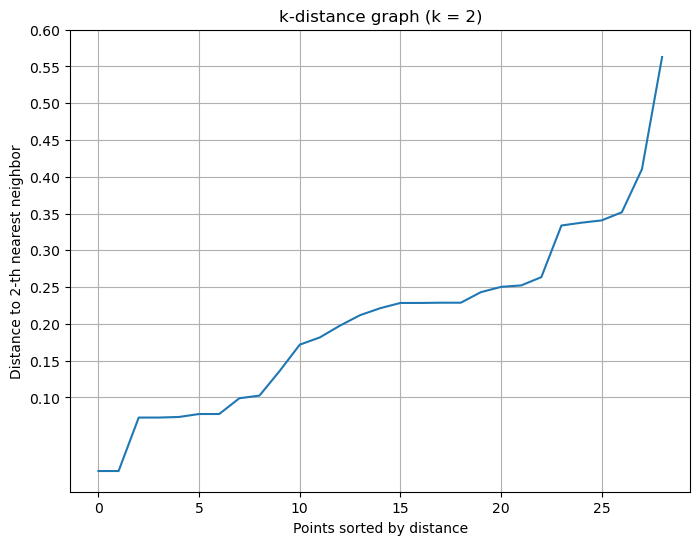

In [348]:
k = 2  # min_samples

# --- Hitung k-distance ---
nbrs = NearestNeighbors(n_neighbors=k).fit(df_num_normalized)
distances, indices = nbrs.kneighbors(df_num_normalized)

k_distances = distances[:, k-1]
k_distances_sorted = np.sort(k_distances)

plt.figure(figsize=(8,6))
plt.plot(k_distances_sorted)
plt.ylabel(f"Distance to {k}-th nearest neighbor")
plt.xlabel("Points sorted by distance")
plt.title(f"k-distance graph (k = {k})")
plt.grid(True)

y_min = 0.10
y_max = 0.60
plt.yticks(np.arange(round(y_min, 2), y_max + 0.05, 0.05))

plt.show()

In [349]:
eps_values = np.arange(0.1, 0.6, 0.05)

for eps in eps_values:
    db = DBSCAN(eps=eps, min_samples=2).fit(df_num_normalized)
    labels = db.labels_
    unique = np.unique(labels)
    print(f"eps = {eps:.2f} → {unique}")

eps = 0.10 → [-1  0  1  2]
eps = 0.15 → [-1  0  1  2]
eps = 0.20 → [-1  0  1  2]
eps = 0.25 → [-1  0  1  2  3  4]
eps = 0.30 → [-1  0  1  2]
eps = 0.35 → [-1  0  1  2]
eps = 0.40 → [-1  0  1  2]
eps = 0.45 → [-1  0  1  2]
eps = 0.50 → [-1  0  1  2]
eps = 0.55 → [-1  0  1]


In [350]:
db_orig_2 = DBSCAN(eps=0.35, min_samples=2).fit(df_num_normalized)
dbscan_labels_original_2 = db_orig_2.labels_

In [351]:
df_plot['DB_Cluster_minsample_2'] = dbscan_labels_original_2

In [352]:
df_plot

,Persentase air bersih PDAM,Persentase petani membeli pupuk,Persentase petani membeli pestisida,"Persentase bangunan rumah bukan ""rumah kecil""",Desa,KM_Cluster,HC_Cluster,DB_Cluster_minsample_2
0,76.666667,66.666667,11.111111,80.000000,Balauring,0,1,-1
1,0.000000,0.000000,7.407407,50.000000,Benihading,1,2,0
2,0.000000,50.000000,83.333333,57.142857,Bour,2,2,1
3,0.000000,0.000000,0.000000,66.666667,Dikesare,1,2,0
4,100.000000,0.000000,0.000000,80.000000,Duawutun,0,1,2
5,16.666667,0.000000,0.000000,63.333333,Dulitukan,1,2,0
6,0.000000,85.714286,57.142857,70.000000,Hoelea I,2,2,-1
7,0.000000,7.142857,53.571429,76.666667,Ile Kimok,1,2,0
8,0.000000,100.000000,100.000000,70.000000,Kalikur,2,2,1
9,100.000000,0.000000,33.333333,70.967742,Katakeja,0,1,2


In [353]:
df_plot['DB_Cluster_minsample_2'].value_counts()

DB_Cluster_minsample_2
 2    13
 0    10
-1     3
 1     3
Name: count, dtype: int64

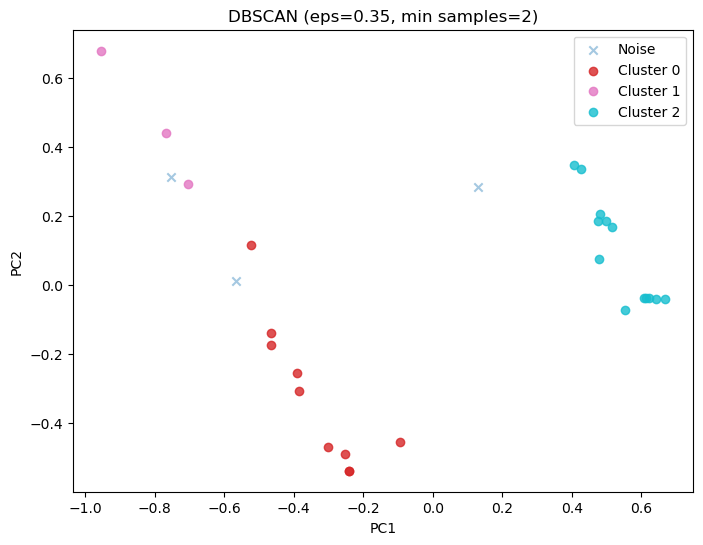

In [354]:
import matplotlib.pyplot as plt
import numpy as np

eps = 0.35
min_samples=2
db = DBSCAN(eps=eps, min_samples=min_samples).fit(df_num_normalized)
labels = db.labels_
unique_labels = np.unique(labels)

plt.figure(figsize=(8, 6))

colors = plt.cm.tab10(np.linspace(0, 1, len(unique_labels)))

for lab, col in zip(unique_labels, colors):
    mask = labels == lab
    if lab == -1:
        label_name = "Noise"
        alpha = 0.4
        marker = "x"
    else:
        label_name = f"Cluster {lab}"
        alpha = 0.8
        marker = "o"
    plt.scatter(
        X_pca[mask, 0],
        X_pca[mask, 1],
        c=[col],
        label=label_name,
        alpha=alpha,
        marker=marker
    )

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title(f"DBSCAN (eps={eps}, min samples={min_samples})")
plt.legend()
plt.show()

#### min samples = 3

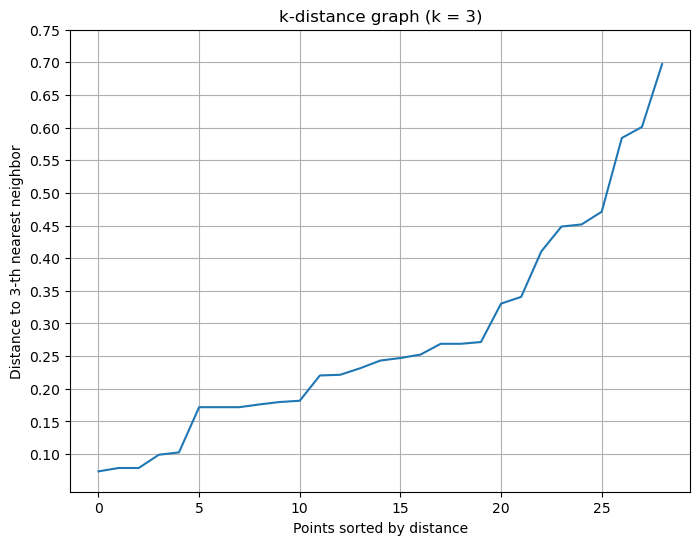

In [355]:
k = 3  # min_samples

# --- Hitung k-distance ---
nbrs = NearestNeighbors(n_neighbors=k).fit(df_num_normalized)
distances, indices = nbrs.kneighbors(df_num_normalized)

k_distances = distances[:, k-1]
k_distances_sorted = np.sort(k_distances)

plt.figure(figsize=(8,6))
plt.plot(k_distances_sorted)
plt.ylabel(f"Distance to {k}-th nearest neighbor")
plt.xlabel("Points sorted by distance")
plt.title(f"k-distance graph (k = {k})")
plt.grid(True)

y_min = 0.10
y_max = 0.75
plt.yticks(np.arange(round(y_min, 2), y_max + 0.05, 0.05))

plt.show()

In [356]:
eps_values = np.arange(0.1, 0.75, 0.05)

for eps in eps_values:
    db = DBSCAN(eps=eps, min_samples=3).fit(df_num_normalized)
    labels = db.labels_
    unique = np.unique(labels)
    print(f"eps = {eps:.2f} → {unique}")

eps = 0.10 → [-1  0  1]
eps = 0.15 → [-1  0  1]
eps = 0.20 → [-1  0  1  2]
eps = 0.25 → [-1  0  1  2]
eps = 0.30 → [-1  0  1]
eps = 0.35 → [-1  0  1  2]
eps = 0.40 → [-1  0  1  2]
eps = 0.45 → [-1  0  1  2]
eps = 0.50 → [-1  0  1  2]
eps = 0.55 → [-1  0  1]
eps = 0.60 → [0 1]
eps = 0.65 → [0 1]
eps = 0.70 → [0 1]


In [357]:
db_orig_3 = DBSCAN(eps=0.27, min_samples=3).fit(df_num_normalized)
dbscan_labels_original_3 = db_orig_3.labels_

In [358]:
df_plot['DB_Cluster_minsample_3'] = dbscan_labels_original_3

In [359]:
df_plot

,Persentase air bersih PDAM,Persentase petani membeli pupuk,Persentase petani membeli pestisida,"Persentase bangunan rumah bukan ""rumah kecil""",Desa,KM_Cluster,HC_Cluster,DB_Cluster_minsample_2,DB_Cluster_minsample_3
0,76.666667,66.666667,11.111111,80.000000,Balauring,0,1,-1,-1
1,0.000000,0.000000,7.407407,50.000000,Benihading,1,2,0,0
2,0.000000,50.000000,83.333333,57.142857,Bour,2,2,1,-1
3,0.000000,0.000000,0.000000,66.666667,Dikesare,1,2,0,0
4,100.000000,0.000000,0.000000,80.000000,Duawutun,0,1,2,1
5,16.666667,0.000000,0.000000,63.333333,Dulitukan,1,2,0,0
6,0.000000,85.714286,57.142857,70.000000,Hoelea I,2,2,-1,-1
7,0.000000,7.142857,53.571429,76.666667,Ile Kimok,1,2,0,2
8,0.000000,100.000000,100.000000,70.000000,Kalikur,2,2,1,-1
9,100.000000,0.000000,33.333333,70.967742,Katakeja,0,1,2,3


In [360]:
df_plot['DB_Cluster_minsample_3'].value_counts()

DB_Cluster_minsample_3
-1    8
 1    6
 3    6
 0    5
 2    4
Name: count, dtype: int64

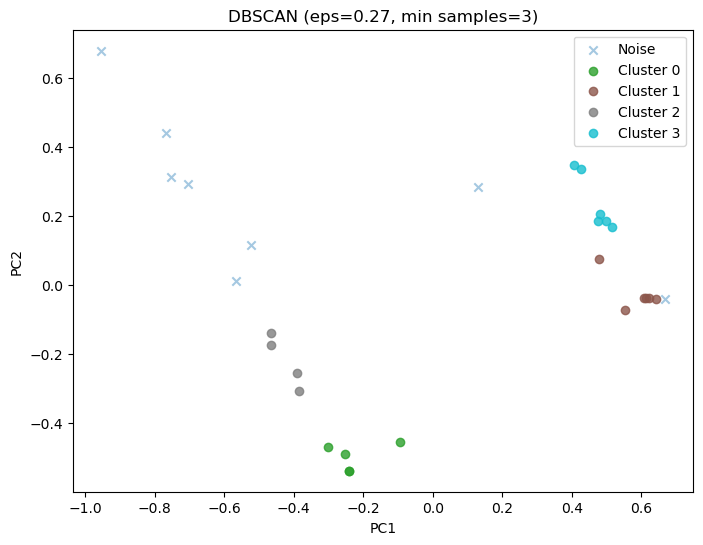

In [361]:
import matplotlib.pyplot as plt
import numpy as np

eps = 0.27
min_samples=3
db = DBSCAN(eps=eps, min_samples=min_samples).fit(df_num_normalized)
labels = db.labels_
unique_labels = np.unique(labels)

plt.figure(figsize=(8, 6))

colors = plt.cm.tab10(np.linspace(0, 1, len(unique_labels)))

for lab, col in zip(unique_labels, colors):
    mask = labels == lab
    if lab == -1:
        label_name = "Noise"
        alpha = 0.4
        marker = "x"
    else:
        label_name = f"Cluster {lab}"
        alpha = 0.8
        marker = "o"
    plt.scatter(
        X_pca[mask, 0],
        X_pca[mask, 1],
        c=[col],
        label=label_name,
        alpha=alpha,
        marker=marker
    )

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title(f"DBSCAN (eps={eps}, min samples={min_samples})")
plt.legend()
plt.show()

### df_plot

In [362]:
df_plot_hasil = df_plot[['Desa', 'KM_Cluster', 'HC_Cluster', 'DB_Cluster_minsample_2', 'DB_Cluster_minsample_3']].copy()

In [363]:
df_plot_hasil

,Desa,KM_Cluster,HC_Cluster,DB_Cluster_minsample_2,DB_Cluster_minsample_3
0,Balauring,0,1,-1,-1
1,Benihading,1,2,0,0
2,Bour,2,2,1,-1
3,Dikesare,1,2,0,0
4,Duawutun,0,1,2,1
5,Dulitukan,1,2,0,0
6,Hoelea I,2,2,-1,-1
7,Ile Kimok,1,2,0,2
8,Kalikur,2,2,1,-1
9,Katakeja,0,1,2,3


## PCA first

In [364]:
import pandas as pd

df_pca = pd.DataFrame(
    X_pca,
    columns=['PC1', 'PC2'],          # nama kolom bebas, tapi ini paling umum
    index=df_normalized.index        # pakai index yang sama dengan df_normalized
)

df_pca

,PC1,PC2
0,0.129297,0.283283
1,-0.252805,-0.489969
2,-0.705043,0.293787
3,-0.242605,-0.538944
4,0.606898,-0.038012
5,-0.095723,-0.455747
6,-0.752153,0.312805
7,-0.466285,-0.138988
8,-0.953974,0.679053
9,0.498086,0.185834


### kmeans

C:\Users\halid\anaconda3\envs\main-ds\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\halid\anaconda3\envs\main-ds\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\halid\anaconda3\envs\main-ds\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\halid\anaconda3\envs\main-ds\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarn

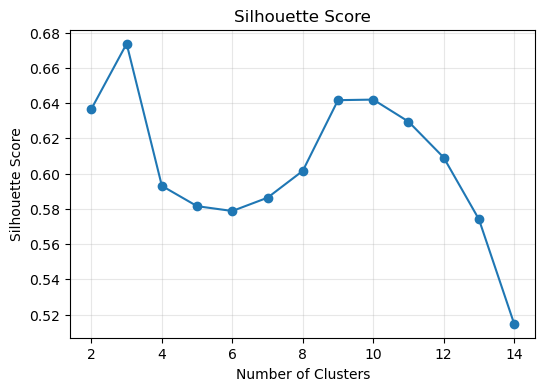

In [365]:
silhouette_scores = []
for k in range(2, 15):
    km = KMeans(n_clusters=k, init='k-means++', random_state=42)
    km.fit(df_pca)
    silhouette_scores.append(silhouette_score(df_pca, km.labels_))

plt.figure(figsize=(6,4))
plt.plot(range(2,15), silhouette_scores, marker='o')
plt.title('Silhouette Score')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.grid(alpha=.3)
plt.show()

In [366]:
# melatih model

model_kmeans_pca = KMeans (
    n_clusters=3,
    init='k-means++',
    random_state=42
)
model_kmeans_pca.fit(df_pca)
kmeans_labels_pca = model_kmeans_pca.labels_
silhouette_score(df_pca, kmeans_labels_pca)

C:\Users\halid\anaconda3\envs\main-ds\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


0.6736762006407478

In [367]:
df_pca_coba = df.copy()

In [368]:
df_pca_coba = df_pca_coba.loc[df_pca.index]
df_pca_coba["KM_Cluster"] = pd.Categorical(kmeans_labels_pca, categories=[0,1,2])

In [369]:
df_pca_coba

,Persentase air bersih PDAM,Persentase petani membeli pupuk,Persentase petani membeli pestisida,"Persentase bangunan rumah bukan ""rumah kecil""",Desa,KM_Cluster
0,76.666667,66.666667,11.111111,80.000000,Balauring,0
1,0.000000,0.000000,7.407407,50.000000,Benihading,2
2,0.000000,50.000000,83.333333,57.142857,Bour,1
3,0.000000,0.000000,0.000000,66.666667,Dikesare,2
4,100.000000,0.000000,0.000000,80.000000,Duawutun,0
5,16.666667,0.000000,0.000000,63.333333,Dulitukan,2
6,0.000000,85.714286,57.142857,70.000000,Hoelea I,1
7,0.000000,7.142857,53.571429,76.666667,Ile Kimok,2
8,0.000000,100.000000,100.000000,70.000000,Kalikur,1
9,100.000000,0.000000,33.333333,70.967742,Katakeja,0


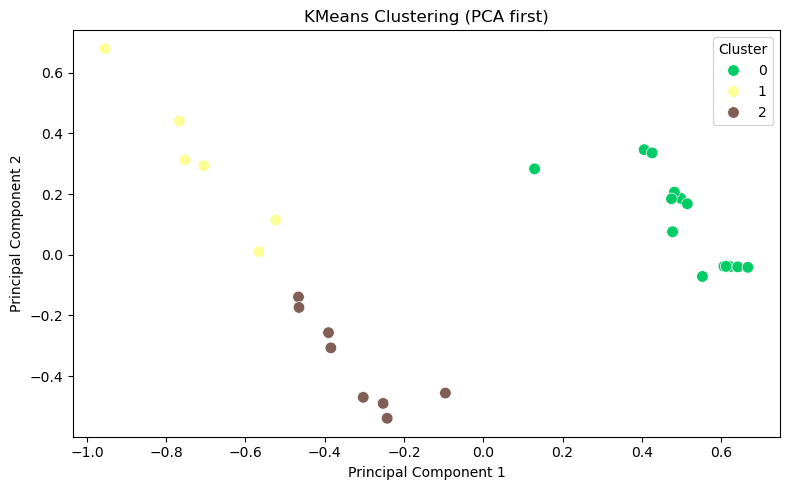

In [370]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=df_pca_coba["KM_Cluster"],
                palette="terrain", s=70, edgecolor="white", linewidth=.5)
plt.title('KMeans Clustering (PCA first)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster', loc='best', frameon=True)
plt.tight_layout()
plt.show()

### Hierarchical Clustering

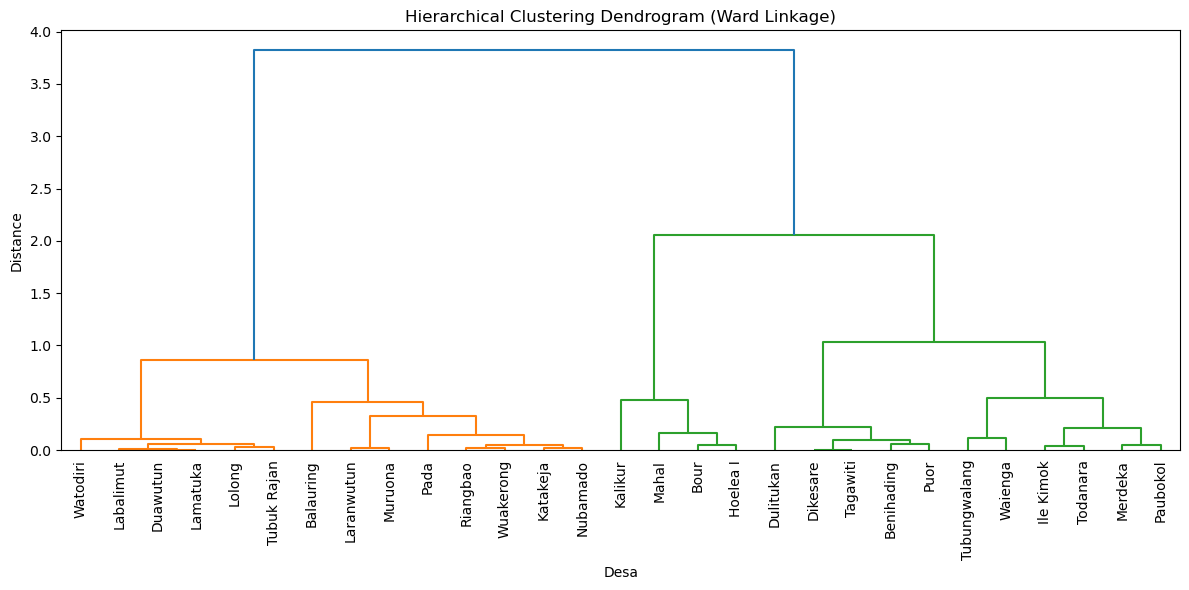

In [371]:
# linkage: 'ward' cocok untuk data numerik
Z_pca = linkage(df_pca, method='ward')

plt.figure(figsize=(12,6))
dendrogram(Z_pca, labels=desa.values, leaf_rotation=90)
plt.title("Hierarchical Clustering Dendrogram (Ward Linkage)")
plt.xlabel("Desa")
plt.ylabel("Distance")
plt.tight_layout()
plt.show()

In [372]:
hc_labels_pca = fcluster(Z_pca, 2, criterion="maxclust")
df_pca_coba["HC_Cluster"] = pd.Categorical(hc_labels_pca)

In [373]:
df_pca_coba

,Persentase air bersih PDAM,Persentase petani membeli pupuk,Persentase petani membeli pestisida,"Persentase bangunan rumah bukan ""rumah kecil""",Desa,KM_Cluster,HC_Cluster
0,76.666667,66.666667,11.111111,80.000000,Balauring,0,1
1,0.000000,0.000000,7.407407,50.000000,Benihading,2,2
2,0.000000,50.000000,83.333333,57.142857,Bour,1,2
3,0.000000,0.000000,0.000000,66.666667,Dikesare,2,2
4,100.000000,0.000000,0.000000,80.000000,Duawutun,0,1
5,16.666667,0.000000,0.000000,63.333333,Dulitukan,2,2
6,0.000000,85.714286,57.142857,70.000000,Hoelea I,1,2
7,0.000000,7.142857,53.571429,76.666667,Ile Kimok,2,2
8,0.000000,100.000000,100.000000,70.000000,Kalikur,1,2
9,100.000000,0.000000,33.333333,70.967742,Katakeja,0,1


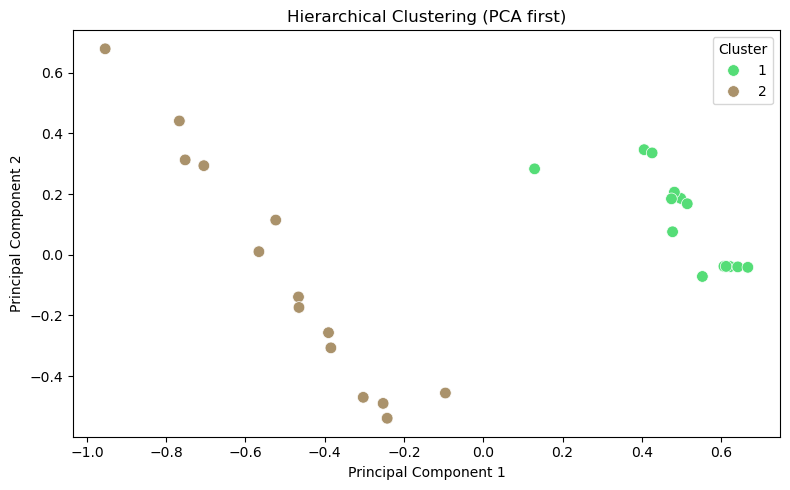

In [374]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=df_pca_coba["HC_Cluster"],
                palette="terrain", s=70, edgecolor="white", linewidth=.5)
plt.title('Hierarchical Clustering (PCA first)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster', loc='best', frameon=True)
plt.tight_layout()
plt.show()

### dbscan

#### min samples = 2

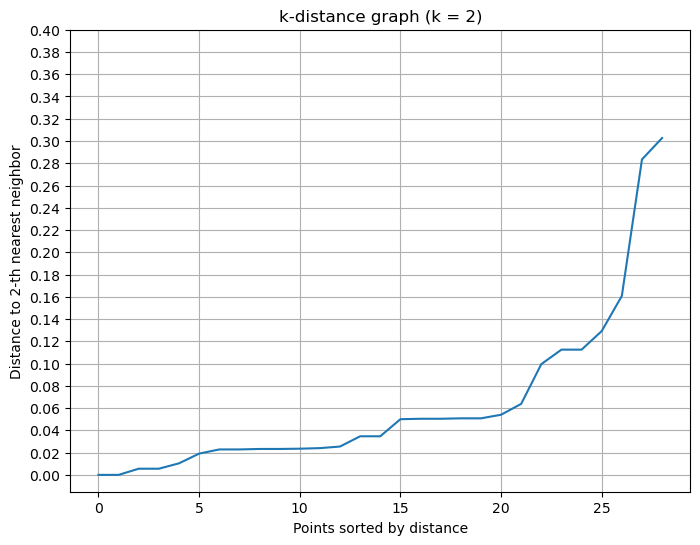

In [375]:
k = 2  # min_samples

# --- Hitung k-distance ---
nbrs = NearestNeighbors(n_neighbors=k).fit(df_pca)
distances, indices = nbrs.kneighbors(df_pca)

k_distances = distances[:, k-1]
k_distances_sorted = np.sort(k_distances)

plt.figure(figsize=(8,6))
plt.plot(k_distances_sorted)
plt.ylabel(f"Distance to {k}-th nearest neighbor")
plt.xlabel("Points sorted by distance")
plt.title(f"k-distance graph (k = {k})")
plt.grid(True)

y_min = 0.00
y_max = 0.40
plt.yticks(np.arange(round(y_min, 2), y_max + 0.02, 0.02))

plt.show()

In [376]:
eps_values = np.arange(0.1, 0.4, 0.02)

for eps in eps_values:
    db = DBSCAN(eps=eps, min_samples=2).fit(df_pca)
    labels = db.labels_
    unique = np.unique(labels)
    print(f"eps = {eps:.2f} → {unique}")

eps = 0.10 → [-1  0  1  2  3  4  5  6]
eps = 0.12 → [-1  0  1  2  3  4  5  6]
eps = 0.14 → [-1  0  1  2  3  4  5  6]
eps = 0.16 → [-1  0  1  2  3  4  5]
eps = 0.18 → [-1  0  1  2  3]
eps = 0.20 → [-1  0  1  2]
eps = 0.22 → [-1  0  1  2]
eps = 0.24 → [-1  0  1  2]
eps = 0.26 → [-1  0  1]
eps = 0.28 → [-1  0  1]
eps = 0.30 → [-1  0  1]
eps = 0.32 → [0 1]
eps = 0.34 → [0 1]
eps = 0.36 → [0 1]
eps = 0.38 → [0 1]
eps = 0.40 → [0 1]


In [377]:
db_pca_2 = DBSCAN(eps=0.14, min_samples=2).fit(df_pca)
dbscan_labels_pca_2 = db_pca_2.labels_

In [378]:
df_pca_coba['DB_Cluster_minsample_2'] = dbscan_labels_pca_2

In [379]:
df_pca_coba

,Persentase air bersih PDAM,Persentase petani membeli pupuk,Persentase petani membeli pestisida,"Persentase bangunan rumah bukan ""rumah kecil""",Desa,KM_Cluster,HC_Cluster,DB_Cluster_minsample_2
0,76.666667,66.666667,11.111111,80.000000,Balauring,0,1,-1
1,0.000000,0.000000,7.407407,50.000000,Benihading,2,2,0
2,0.000000,50.000000,83.333333,57.142857,Bour,1,2,1
3,0.000000,0.000000,0.000000,66.666667,Dikesare,2,2,0
4,100.000000,0.000000,0.000000,80.000000,Duawutun,0,1,2
5,16.666667,0.000000,0.000000,63.333333,Dulitukan,2,2,-1
6,0.000000,85.714286,57.142857,70.000000,Hoelea I,1,2,1
7,0.000000,7.142857,53.571429,76.666667,Ile Kimok,2,2,3
8,0.000000,100.000000,100.000000,70.000000,Kalikur,1,2,-1
9,100.000000,0.000000,33.333333,70.967742,Katakeja,0,1,4


In [380]:
df_pca_coba['DB_Cluster_minsample_2'].value_counts()

DB_Cluster_minsample_2
 2    6
 4    5
 0    4
 3    4
-1    3
 1    3
 5    2
 6    2
Name: count, dtype: int64

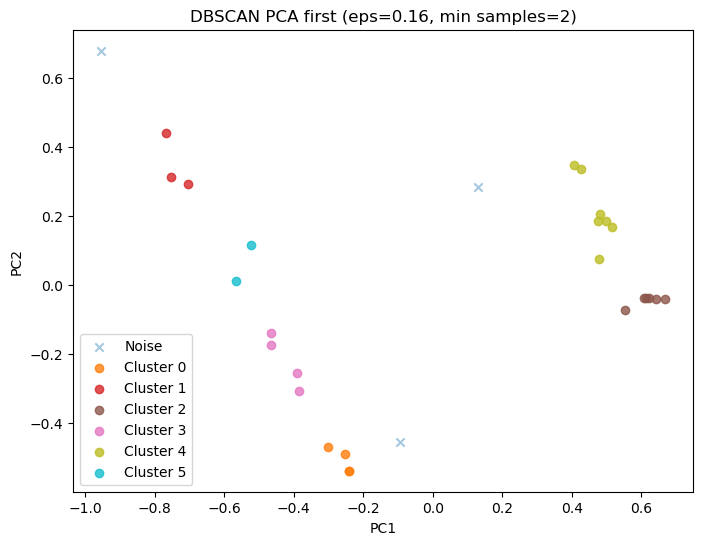

In [381]:
import matplotlib.pyplot as plt
import numpy as np

eps = 0.16
min_samples=2
db = DBSCAN(eps=eps, min_samples=min_samples).fit(df_pca)
labels = db.labels_
unique_labels = np.unique(labels)

plt.figure(figsize=(8, 6))

colors = plt.cm.tab10(np.linspace(0, 1, len(unique_labels)))

for lab, col in zip(unique_labels, colors):
    mask = labels == lab
    if lab == -1:
        label_name = "Noise"
        alpha = 0.4
        marker = "x"
    else:
        label_name = f"Cluster {lab}"
        alpha = 0.8
        marker = "o"
    plt.scatter(
        X_pca[mask, 0],
        X_pca[mask, 1],
        c=[col],
        label=label_name,
        alpha=alpha,
        marker=marker
    )

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title(f"DBSCAN PCA first (eps={eps}, min samples={min_samples})")
plt.legend()
plt.show()

#### min samples = 3

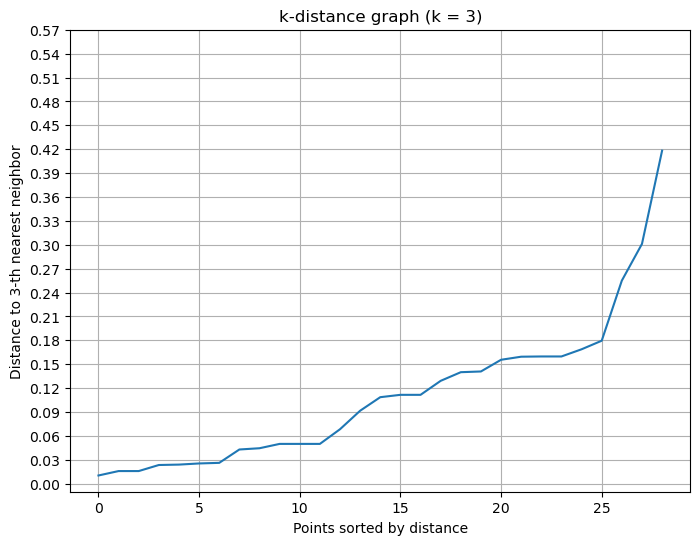

In [382]:
k = 3  # min_samples

# --- Hitung k-distance ---
nbrs = NearestNeighbors(n_neighbors=k).fit(df_pca)
distances, indices = nbrs.kneighbors(df_pca)

k_distances = distances[:, k-1]
k_distances_sorted = np.sort(k_distances)

plt.figure(figsize=(8,6))
plt.plot(k_distances_sorted)
plt.ylabel(f"Distance to {k}-th nearest neighbor")
plt.xlabel("Points sorted by distance")
plt.title(f"k-distance graph (k = {k})")
plt.grid(True)

y_min = 0.00
y_max = 0.55
plt.yticks(np.arange(round(y_min, 2), y_max + 0.03, 0.03))

plt.show()

In [383]:
eps_values = np.arange(0.06, 0.6, 0.03)

for eps in eps_values:
    db = DBSCAN(eps=eps, min_samples=3).fit(df_pca)
    labels = db.labels_
    unique = np.unique(labels)
    print(f"eps = {eps:.2f} → {unique}")

eps = 0.06 → [-1  0  1  2]
eps = 0.09 → [-1  0  1  2]
eps = 0.12 → [-1  0  1  2  3]
eps = 0.15 → [-1  0  1  2  3  4]
eps = 0.18 → [-1  0  1  2  3]
eps = 0.21 → [-1  0  1  2]
eps = 0.24 → [-1  0  1  2]
eps = 0.27 → [-1  0  1]
eps = 0.30 → [-1  0  1]
eps = 0.33 → [0 1]
eps = 0.36 → [0 1]
eps = 0.39 → [0 1]
eps = 0.42 → [0 1]
eps = 0.45 → [0 1]
eps = 0.48 → [0 1]
eps = 0.51 → [0 1]
eps = 0.54 → [0 1]
eps = 0.57 → [0 1]
eps = 0.60 → [0 1]


In [384]:
db_pca_3 = DBSCAN(eps=0.18, min_samples=3).fit(df_pca)
dbscan_labels_pca_3 = db_pca_3.labels_

In [385]:
df_pca_coba['DB_Cluster_minsample_3'] = dbscan_labels_pca_3

In [386]:
df_pca_coba

,Persentase air bersih PDAM,Persentase petani membeli pupuk,Persentase petani membeli pestisida,"Persentase bangunan rumah bukan ""rumah kecil""",Desa,KM_Cluster,HC_Cluster,DB_Cluster_minsample_2,DB_Cluster_minsample_3
0,76.666667,66.666667,11.111111,80.000000,Balauring,0,1,-1,-1
1,0.000000,0.000000,7.407407,50.000000,Benihading,2,2,0,0
2,0.000000,50.000000,83.333333,57.142857,Bour,1,2,1,1
3,0.000000,0.000000,0.000000,66.666667,Dikesare,2,2,0,0
4,100.000000,0.000000,0.000000,80.000000,Duawutun,0,1,2,2
5,16.666667,0.000000,0.000000,63.333333,Dulitukan,2,2,-1,0
6,0.000000,85.714286,57.142857,70.000000,Hoelea I,1,2,1,1
7,0.000000,7.142857,53.571429,76.666667,Ile Kimok,2,2,3,3
8,0.000000,100.000000,100.000000,70.000000,Kalikur,1,2,-1,-1
9,100.000000,0.000000,33.333333,70.967742,Katakeja,0,1,4,2


In [387]:
df_pca_coba['DB_Cluster_minsample_3'].value_counts()

DB_Cluster_minsample_3
 2    13
 3     6
 0     5
 1     3
-1     2
Name: count, dtype: int64

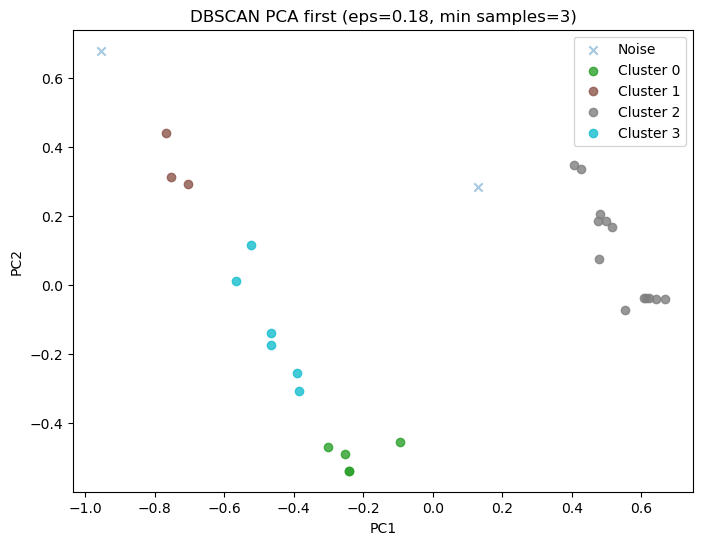

In [388]:
import matplotlib.pyplot as plt
import numpy as np

eps = 0.18
min_samples=3
db = DBSCAN(eps=eps, min_samples=min_samples).fit(df_pca)
labels = db.labels_
unique_labels = np.unique(labels)

plt.figure(figsize=(8, 6))

colors = plt.cm.tab10(np.linspace(0, 1, len(unique_labels)))

for lab, col in zip(unique_labels, colors):
    mask = labels == lab
    if lab == -1:
        label_name = "Noise"
        alpha = 0.4
        marker = "x"
    else:
        label_name = f"Cluster {lab}"
        alpha = 0.8
        marker = "o"
    plt.scatter(
        X_pca[mask, 0],
        X_pca[mask, 1],
        c=[col],
        label=label_name,
        alpha=alpha,
        marker=marker
    )

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title(f"DBSCAN PCA first (eps={eps}, min samples={min_samples})")
plt.legend()
plt.show()

### df_pca_hasil

In [389]:
df_pca_hasil = df_pca_coba[['Desa', 'KM_Cluster', 'HC_Cluster', 'DB_Cluster_minsample_2', 'DB_Cluster_minsample_3']].copy()

In [390]:
df_pca_hasil

,Desa,KM_Cluster,HC_Cluster,DB_Cluster_minsample_2,DB_Cluster_minsample_3
0,Balauring,0,1,-1,-1
1,Benihading,2,2,0,0
2,Bour,1,2,1,1
3,Dikesare,2,2,0,0
4,Duawutun,0,1,2,2
5,Dulitukan,2,2,-1,0
6,Hoelea I,1,2,1,1
7,Ile Kimok,2,2,3,3
8,Kalikur,1,2,-1,-1
9,Katakeja,0,1,4,2


# analisis sebaran masing-masing cluster

In [391]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

## clustering real distance

### Boxplot

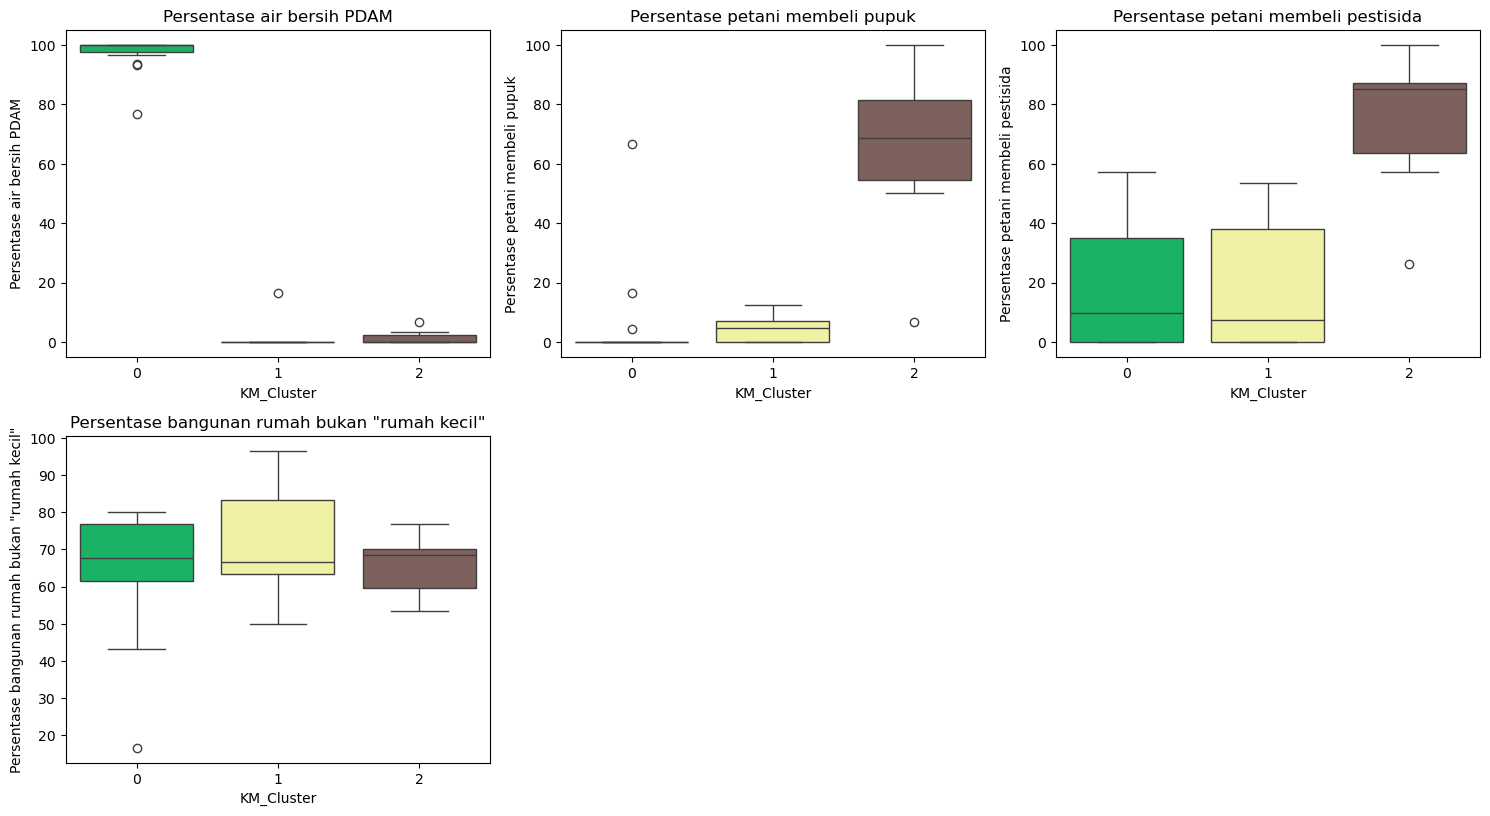

In [392]:
fig, axes = plt.subplots(rows, cols, figsize=(15, rows*4))
axes = axes.flatten()
for i, col in enumerate(numerical_cols):
    sns.boxplot(x="KM_Cluster", y=col, data=df_plot, palette="terrain", ax=axes[i])
    axes[i].set_title(f"{col}")
for j in range(i+1, len(axes)): fig.delaxes(axes[j])
plt.tight_layout()
plt.show()

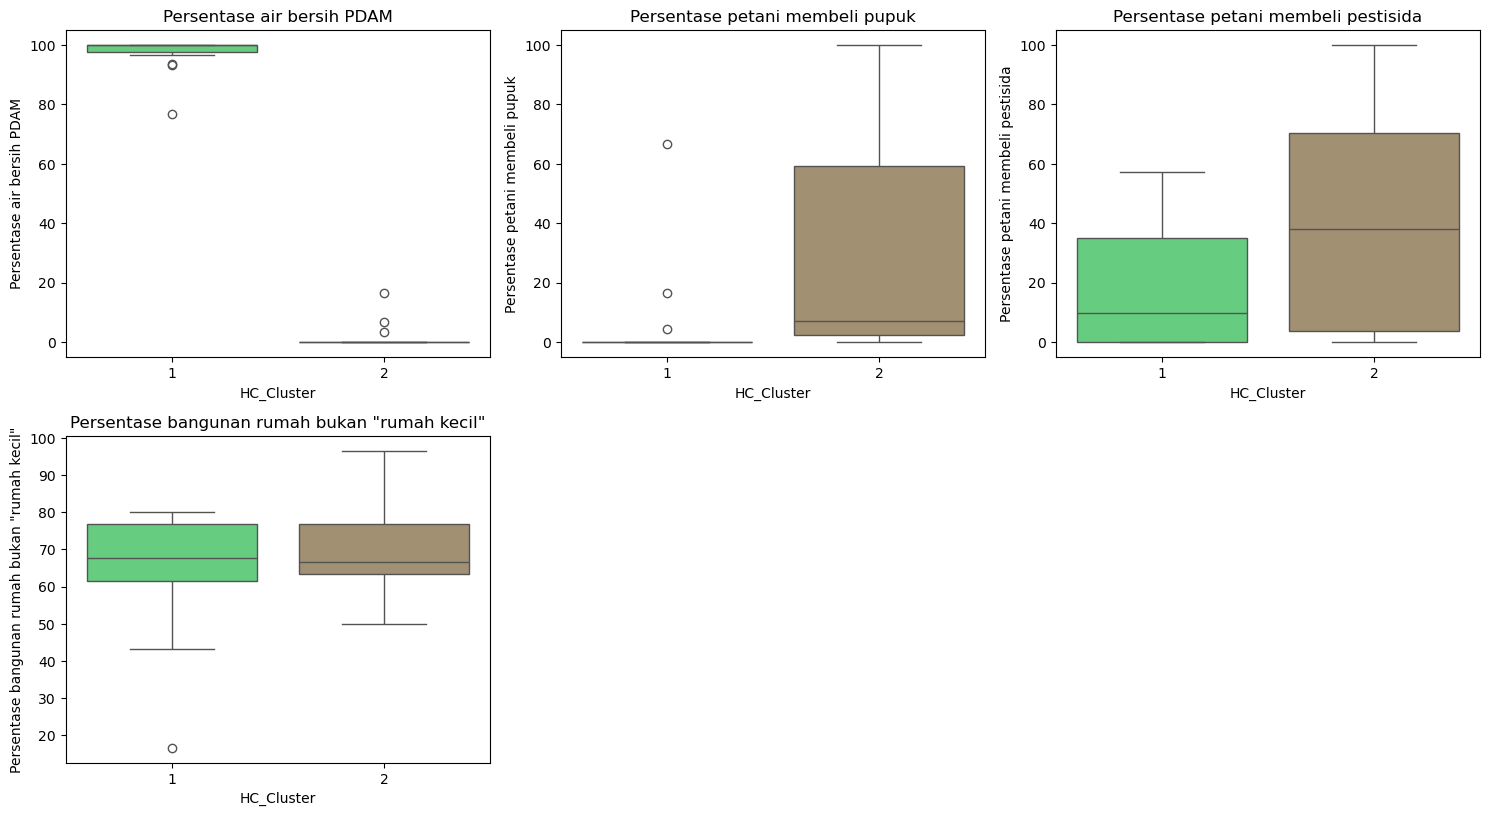

In [393]:
fig, axes = plt.subplots(rows, cols, figsize=(15, rows*4))
axes = axes.flatten()
for i, col in enumerate(numerical_cols):
    sns.boxplot(x="HC_Cluster", y=col, data=df_plot, palette="terrain", ax=axes[i])
    axes[i].set_title(f"{col}")
for j in range(i+1, len(axes)): fig.delaxes(axes[j])
plt.tight_layout()
plt.show()

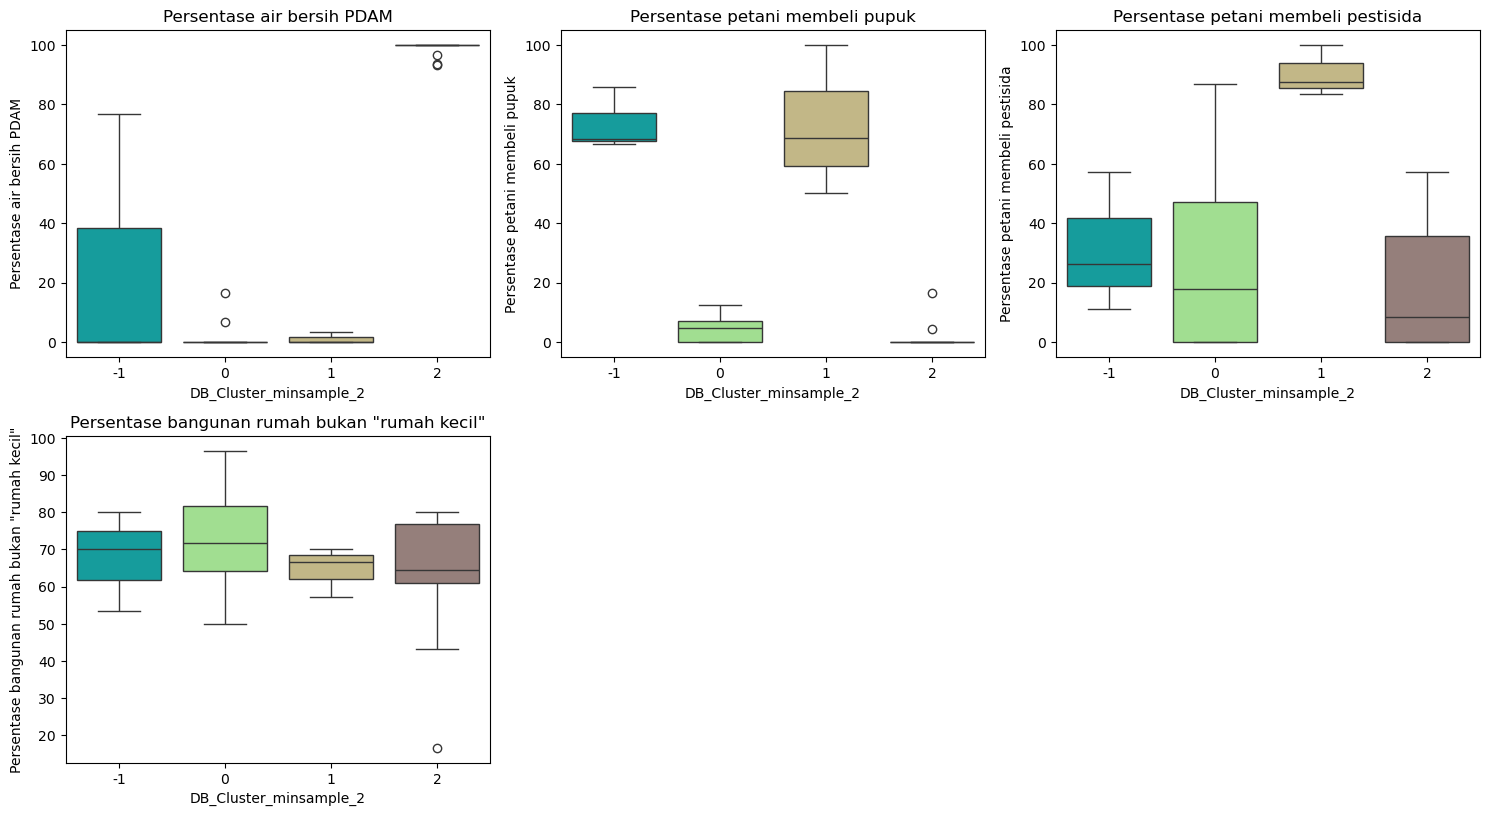

In [394]:
fig, axes = plt.subplots(rows, cols, figsize=(15, rows*4))
axes = axes.flatten()
for i, col in enumerate(numerical_cols):
    sns.boxplot(x="DB_Cluster_minsample_2", y=col, data=df_plot, palette="terrain", ax=axes[i])
    axes[i].set_title(f"{col}")
for j in range(i+1, len(axes)): fig.delaxes(axes[j])
plt.tight_layout()
plt.show()

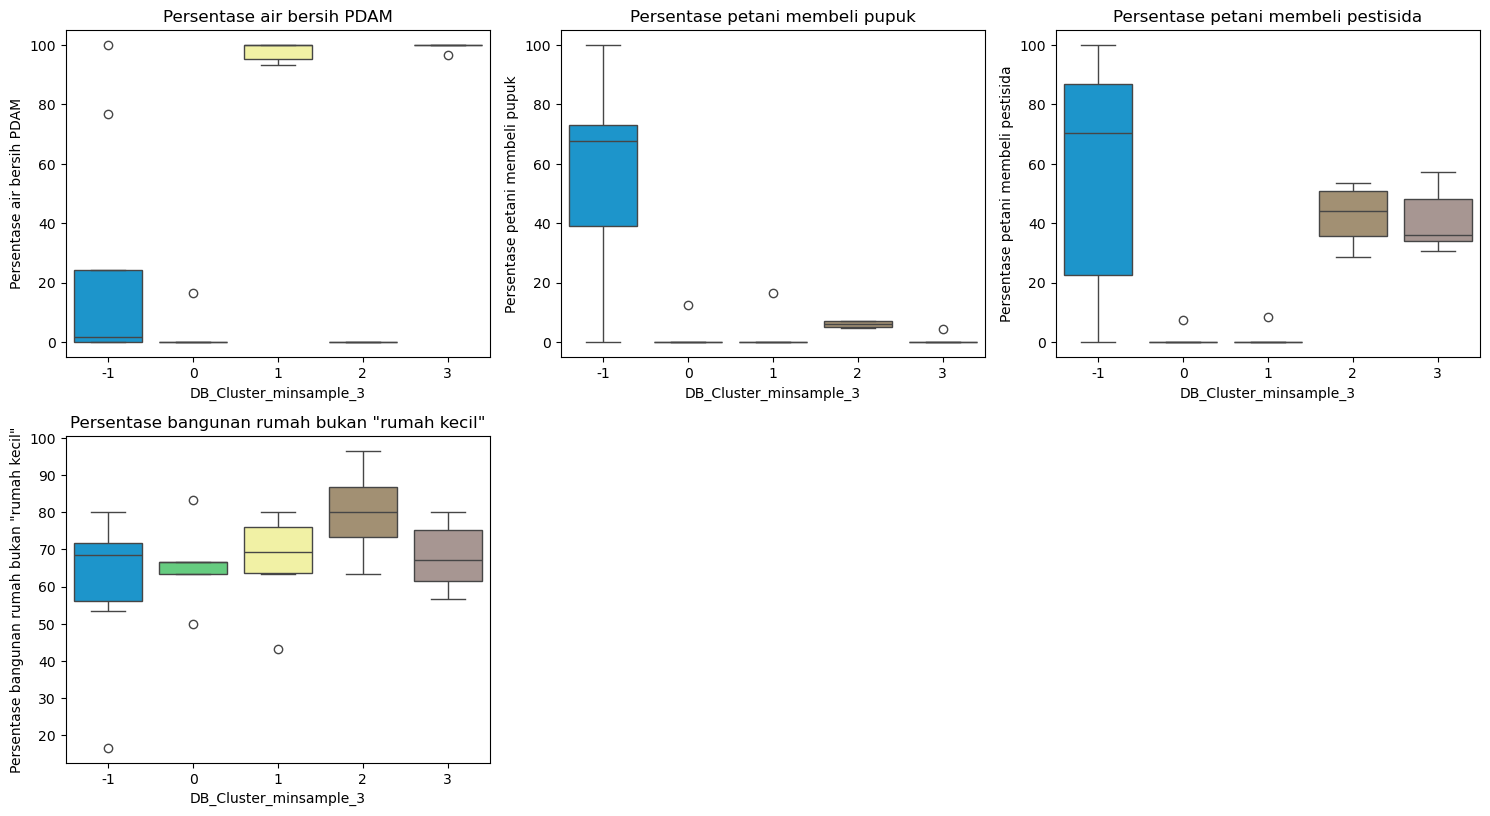

In [395]:
fig, axes = plt.subplots(rows, cols, figsize=(15, rows*4))
axes = axes.flatten()
for i, col in enumerate(numerical_cols):
    sns.boxplot(x="DB_Cluster_minsample_3", y=col, data=df_plot, palette="terrain", ax=axes[i])
    axes[i].set_title(f"{col}")
for j in range(i+1, len(axes)): fig.delaxes(axes[j])
plt.tight_layout()
plt.show()

### bar chart

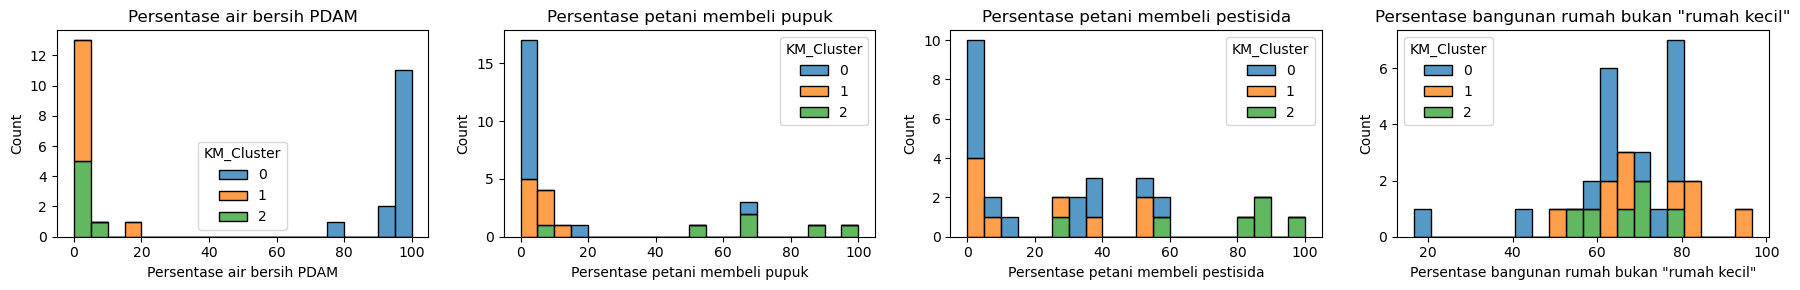

In [396]:
cols = 4
rows = (len(numerical_cols) + cols - 1) // cols

fig, axes = plt.subplots(rows, cols, figsize=(18, rows * 3))
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    
    sns.histplot(
        data=df_plot,
        x=col,
        hue="KM_Cluster",
        multiple="stack",
        bins=20,
        palette="tab10",
        ax=axes[i]
    )

    axes[i].set_title(f"{col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Count")

# hapus subplot kosong
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

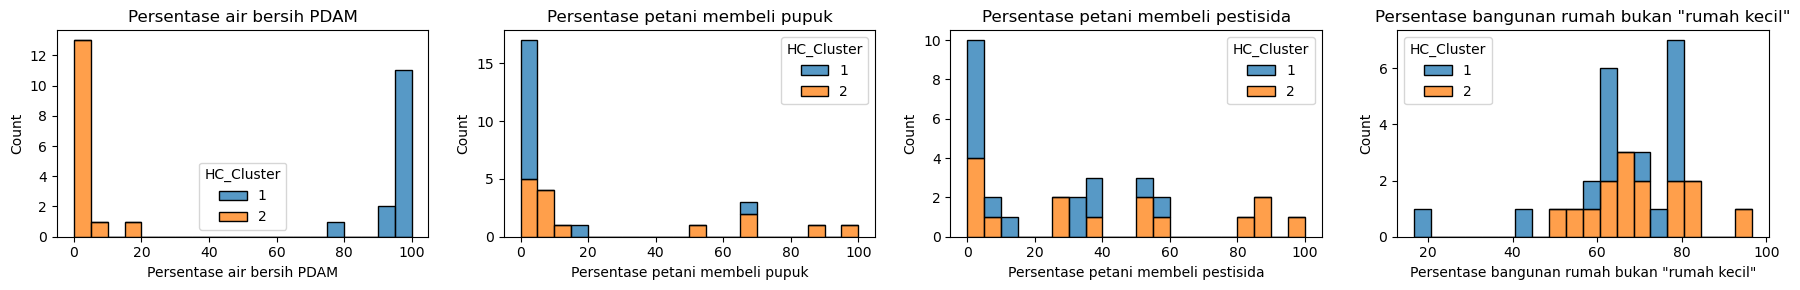

In [397]:
cols = 4
rows = (len(numerical_cols) + cols - 1) // cols

fig, axes = plt.subplots(rows, cols, figsize=(18, rows * 3))
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    
    sns.histplot(
        data=df_plot,
        x=col,
        hue="HC_Cluster",
        multiple="stack",
        bins=20,
        palette="tab10",
        ax=axes[i]
    )

    axes[i].set_title(f"{col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Count")

# hapus subplot kosong
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

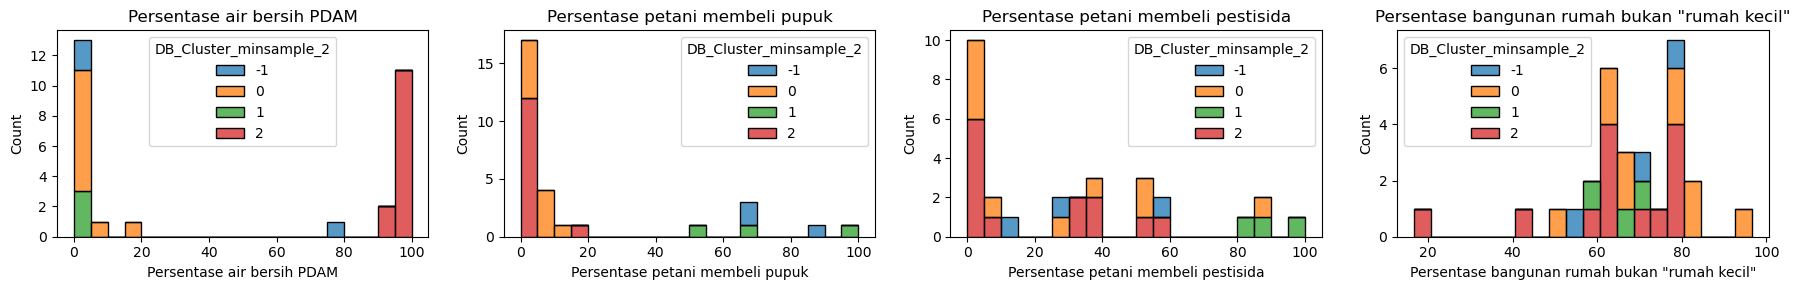

In [398]:
cols = 4
rows = (len(numerical_cols) + cols - 1) // cols

fig, axes = plt.subplots(rows, cols, figsize=(18, rows * 3))
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    
    sns.histplot(
        data=df_plot,
        x=col,
        hue="DB_Cluster_minsample_2",
        multiple="stack",
        bins=20,
        palette="tab10",
        ax=axes[i]
    )

    axes[i].set_title(f"{col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Count")

# hapus subplot kosong
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

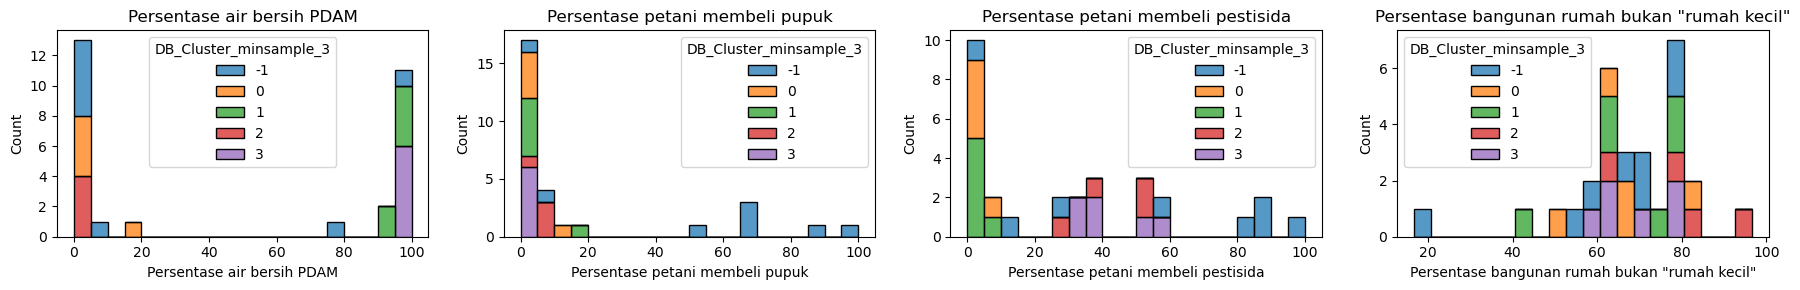

In [399]:
cols = 4
rows = (len(numerical_cols) + cols - 1) // cols

fig, axes = plt.subplots(rows, cols, figsize=(18, rows * 3))
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    
    sns.histplot(
        data=df_plot,
        x=col,
        hue="DB_Cluster_minsample_3",
        multiple="stack",
        bins=20,
        palette="tab10",
        ax=axes[i]
    )

    axes[i].set_title(f"{col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Count")

# hapus subplot kosong
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

### GRAFIK

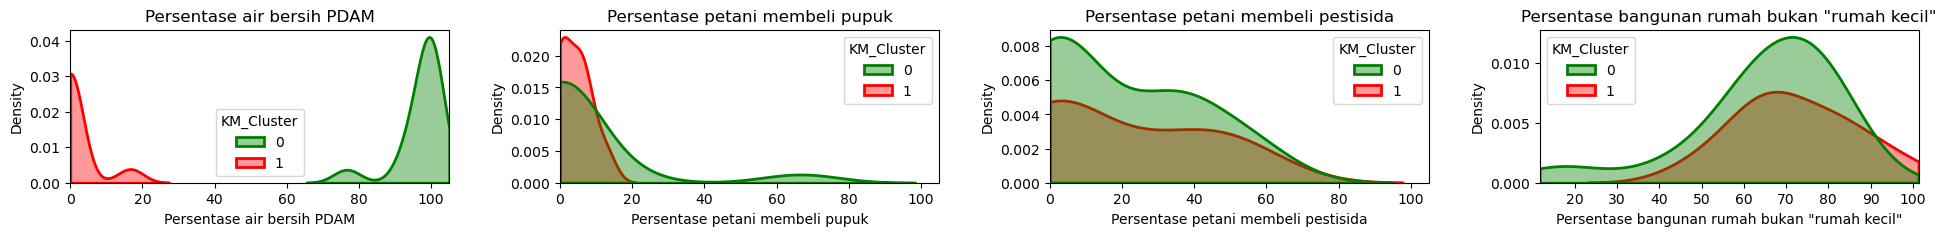

In [400]:
cols = 4 
fig, axes = plt.subplots(rows, cols, figsize=(20, rows * 3))
axes = axes.flatten()

custom_palette = {0: "green", 1: "red", 2:"blue"} 

for i, col in enumerate(numerical_cols):
    if i >= len(axes):
        break
    max_val = df_plot[col].max()
    if max_val < 20:
        x_max = max_val + 2
    else:
        x_max = max_val * 1.05
        
    x_min = df_plot[col].min()
    x_min = max(0, x_min - 0.05 * x_max)
    
    sns.kdeplot(
        data=df_plot,
        x=col,
        hue="KM_Cluster",
        palette=custom_palette,
        hue_order=[0, 1],
        fill=True,
        alpha=0.4,
        linewidth=2,
        ax=axes[i],
        clip=(x_min, x_max)
    )
    axes[i].set_xlim(x_min, x_max)
    axes[i].set_title(f"{col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Density")

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout(pad=3)
plt.show()

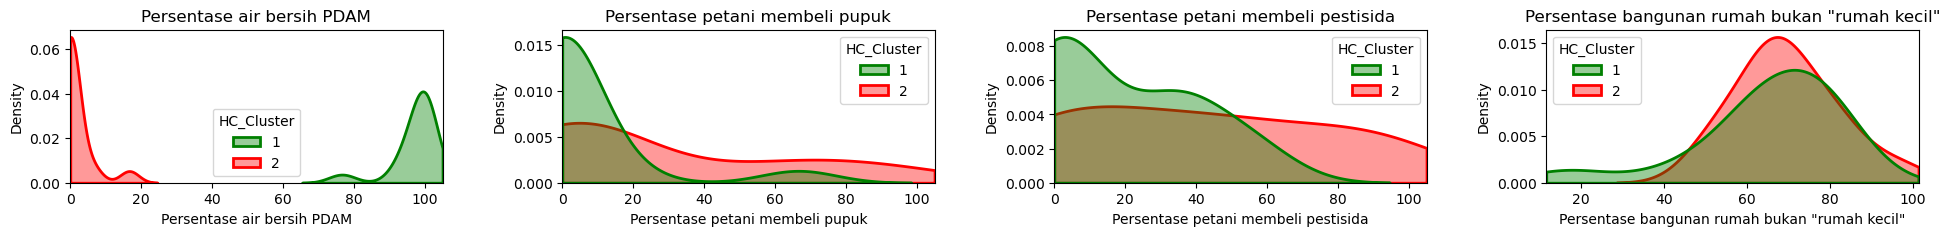

In [401]:
cols = 4 
fig, axes = plt.subplots(rows, cols, figsize=(20, rows * 3))
axes = axes.flatten()

custom_palette = {1: "green", 2: "red"} 

for i, col in enumerate(numerical_cols):
    if i >= len(axes):
        break
    max_val = df_plot[col].max()
    if max_val < 20:
        x_max = max_val + 2
    else:
        x_max = max_val * 1.05
        
    x_min = df_plot[col].min()
    x_min = max(0, x_min - 0.05 * x_max)
    
    sns.kdeplot(
        data=df_plot,
        x=col,
        hue="HC_Cluster",
        palette=custom_palette,
        hue_order=[1, 2],
        fill=True,
        alpha=0.4,
        linewidth=2,
        ax=axes[i],
        clip=(x_min, x_max)
    )
    axes[i].set_xlim(x_min, x_max)
    axes[i].set_title(f"{col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Density")

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout(pad=3)
plt.show()

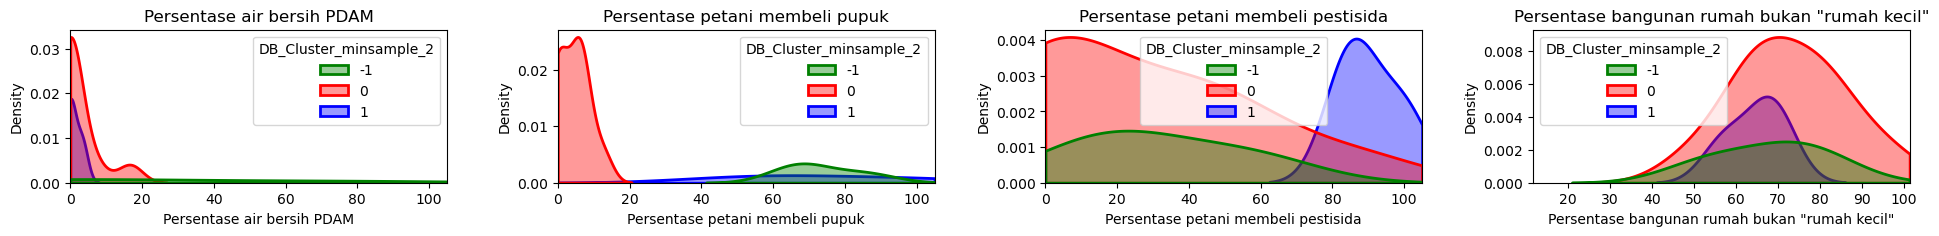

In [402]:
cols = 4 
fig, axes = plt.subplots(rows, cols, figsize=(20, rows * 3))
axes = axes.flatten()

custom_palette = {-1: "green", 0: "red", 1: "blue"} 

for i, col in enumerate(numerical_cols):
    if i >= len(axes):
        break
    max_val = df_plot[col].max()
    if max_val < 20:
        x_max = max_val + 2
    else:
        x_max = max_val * 1.05
        
    x_min = df_plot[col].min()
    x_min = max(0, x_min - 0.05 * x_max)
    
    sns.kdeplot(
        data=df_plot,
        x=col,
        hue="DB_Cluster_minsample_2",
        palette=custom_palette,
        hue_order=[-1, 0, 1],
        fill=True,
        alpha=0.4,
        linewidth=2,
        ax=axes[i],
        clip=(x_min, x_max)
    )
    axes[i].set_xlim(x_min, x_max)
    axes[i].set_title(f"{col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Density")

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout(pad=3)
plt.show()

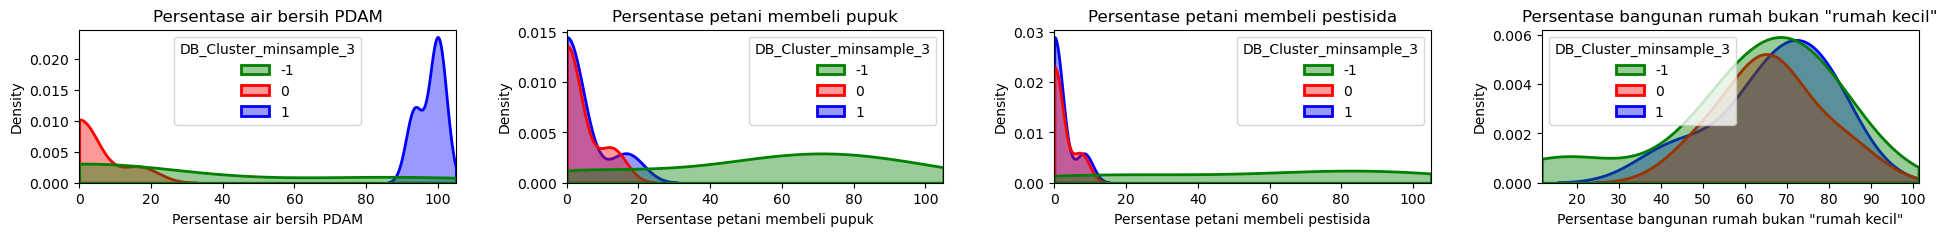

In [403]:
cols = 4 
fig, axes = plt.subplots(rows, cols, figsize=(20, rows * 3))
axes = axes.flatten()

custom_palette = {-1: "green", 0: "red", 1: "blue"} 

for i, col in enumerate(numerical_cols):
    if i >= len(axes):
        break
    max_val = df_plot[col].max()
    if max_val < 20:
        x_max = max_val + 2
    else:
        x_max = max_val * 1.05
        
    x_min = df_plot[col].min()
    x_min = max(0, x_min - 0.05 * x_max)
    
    sns.kdeplot(
        data=df_plot,
        x=col,
        hue="DB_Cluster_minsample_3",
        palette=custom_palette,
        hue_order=[-1, 0, 1],
        fill=True,
        alpha=0.4,
        linewidth=2,
        ax=axes[i],
        clip=(x_min, x_max)
    )
    axes[i].set_xlim(x_min, x_max)
    axes[i].set_title(f"{col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Density")

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout(pad=3)
plt.show()

## PCA

### Boxplot

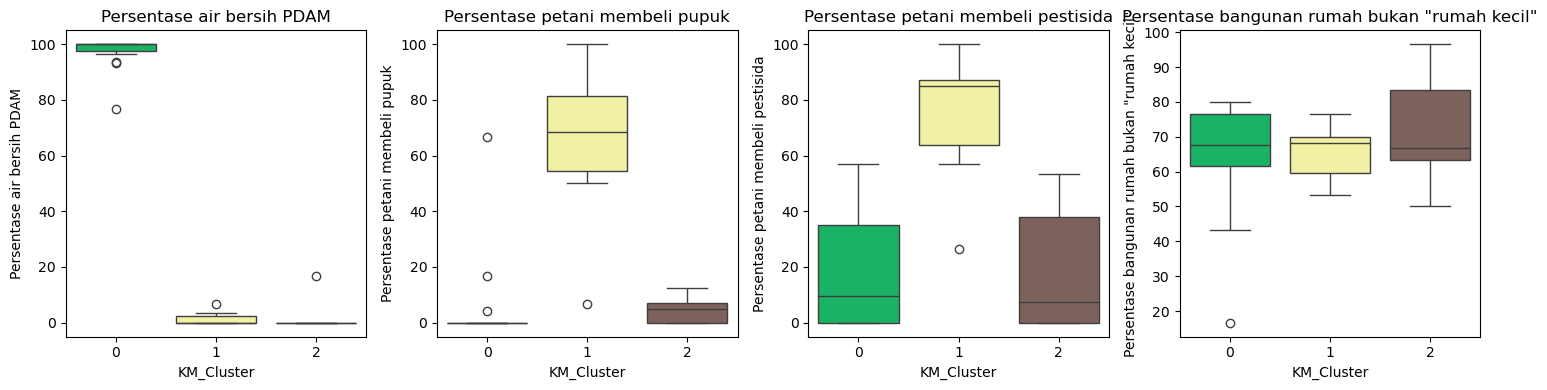

In [404]:
fig, axes = plt.subplots(rows, cols, figsize=(15, rows*4))
axes = axes.flatten()
for i, col in enumerate(numerical_cols):
    sns.boxplot(x="KM_Cluster", y=col, data=df_pca_coba, palette="terrain", ax=axes[i])
    axes[i].set_title(f"{col}")
for j in range(i+1, len(axes)): fig.delaxes(axes[j])
plt.tight_layout()
plt.show()

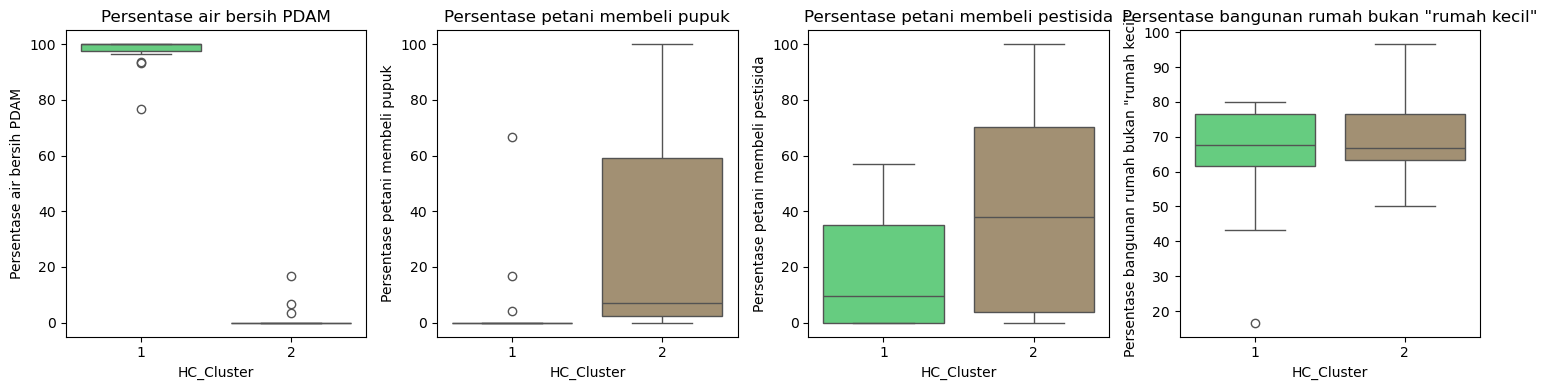

In [405]:
fig, axes = plt.subplots(rows, cols, figsize=(15, rows*4))
axes = axes.flatten()
for i, col in enumerate(numerical_cols):
    sns.boxplot(x="HC_Cluster", y=col, data=df_pca_coba, palette="terrain", ax=axes[i])
    axes[i].set_title(f"{col}")
for j in range(i+1, len(axes)): fig.delaxes(axes[j])
plt.tight_layout()
plt.show()

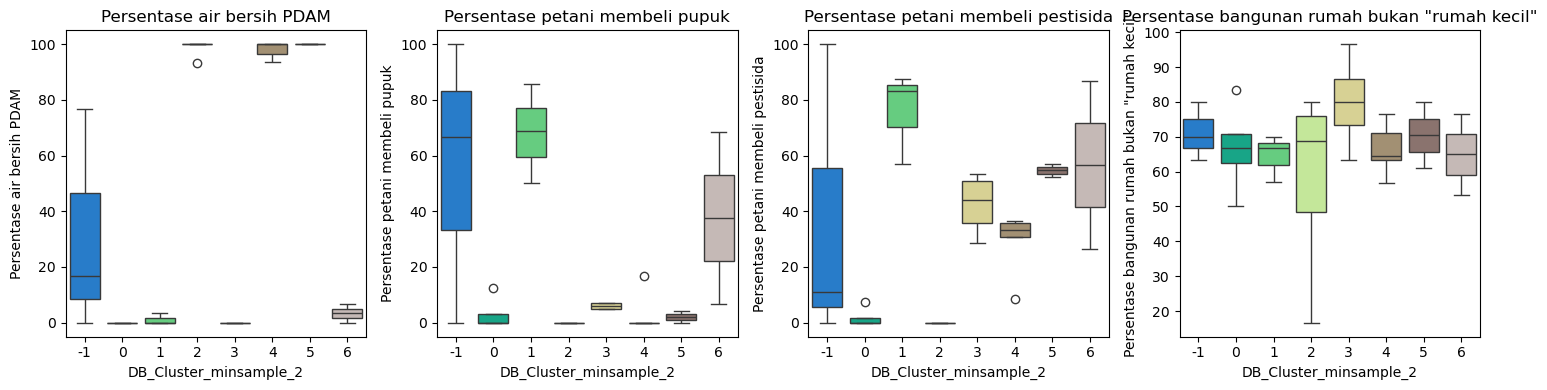

In [406]:
fig, axes = plt.subplots(rows, cols, figsize=(15, rows*4))
axes = axes.flatten()
for i, col in enumerate(numerical_cols):
    sns.boxplot(x="DB_Cluster_minsample_2", y=col, data=df_pca_coba, palette="terrain", ax=axes[i])
    axes[i].set_title(f"{col}")
for j in range(i+1, len(axes)): fig.delaxes(axes[j])
plt.tight_layout()
plt.show()

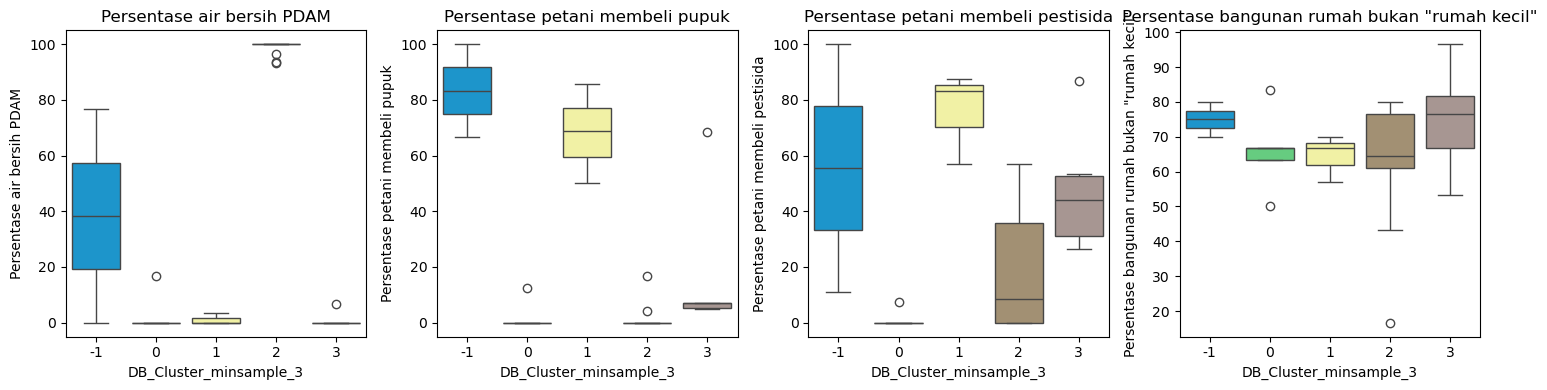

In [407]:
fig, axes = plt.subplots(rows, cols, figsize=(15, rows*4))
axes = axes.flatten()
for i, col in enumerate(numerical_cols):
    sns.boxplot(x="DB_Cluster_minsample_3", y=col, data=df_pca_coba, palette="terrain", ax=axes[i])
    axes[i].set_title(f"{col}")
for j in range(i+1, len(axes)): fig.delaxes(axes[j])
plt.tight_layout()
plt.show()

### bar chart

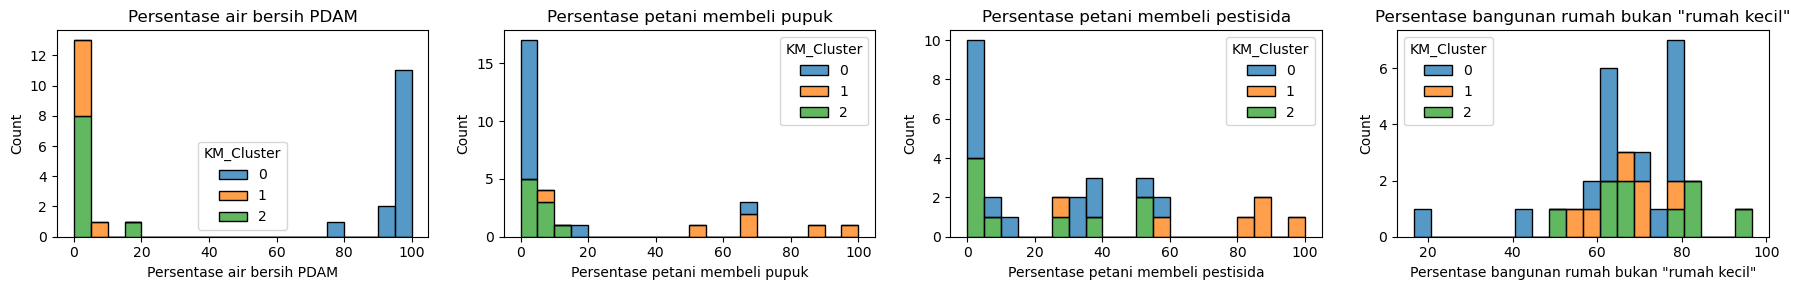

In [408]:
cols = 4
rows = (len(numerical_cols) + cols - 1) // cols

fig, axes = plt.subplots(rows, cols, figsize=(18, rows * 3))
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    
    sns.histplot(
        data=df_pca_coba,
        x=col,
        hue="KM_Cluster",
        multiple="stack",
        bins=20,
        palette="tab10",
        ax=axes[i]
    )

    axes[i].set_title(f"{col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Count")

# hapus subplot kosong
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

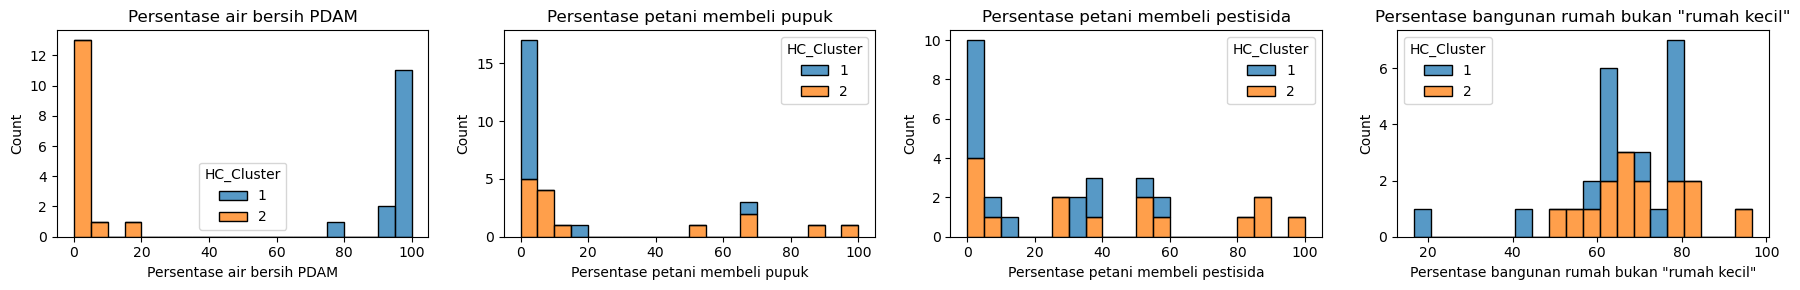

In [409]:
cols = 4
rows = (len(numerical_cols) + cols - 1) // cols

fig, axes = plt.subplots(rows, cols, figsize=(18, rows * 3))
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    
    sns.histplot(
        data=df_pca_coba,
        x=col,
        hue="HC_Cluster",
        multiple="stack",
        bins=20,
        palette="tab10",
        ax=axes[i]
    )

    axes[i].set_title(f"{col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Count")

# hapus subplot kosong
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

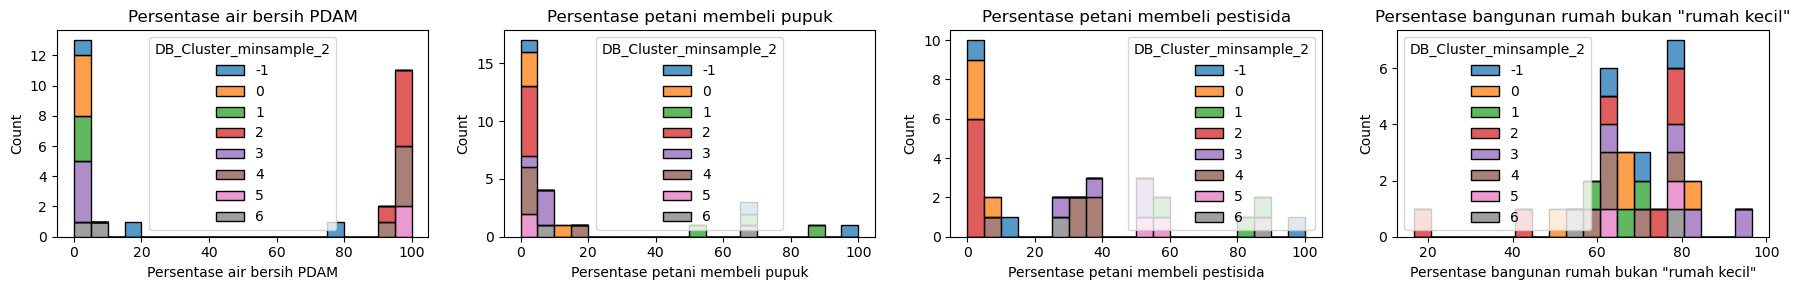

In [410]:
cols = 4
rows = (len(numerical_cols) + cols - 1) // cols

fig, axes = plt.subplots(rows, cols, figsize=(18, rows * 3))
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    
    sns.histplot(
        data=df_pca_coba,
        x=col,
        hue="DB_Cluster_minsample_2",
        multiple="stack",
        bins=20,
        palette="tab10",
        ax=axes[i]
    )

    axes[i].set_title(f"{col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Count")

# hapus subplot kosong
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

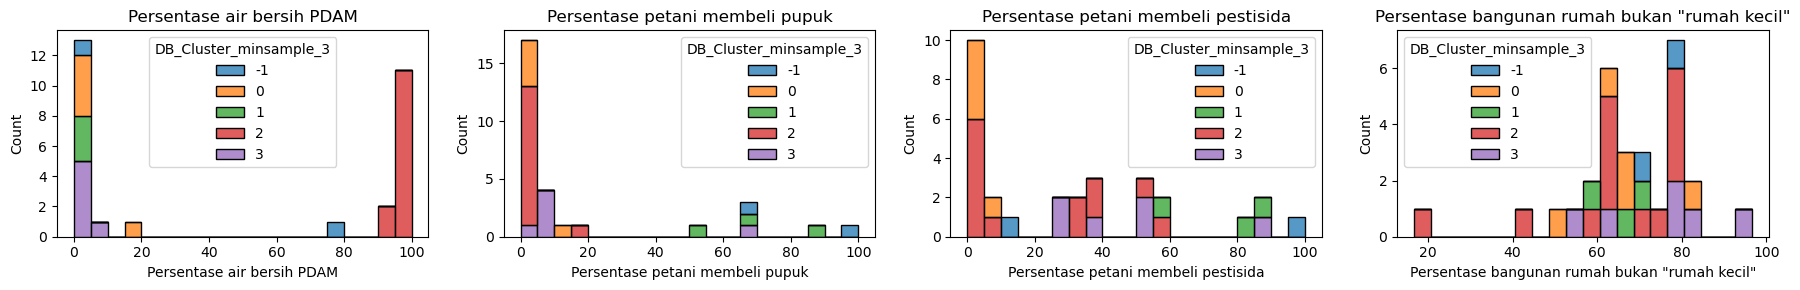

In [411]:
cols = 4
rows = (len(numerical_cols) + cols - 1) // cols

fig, axes = plt.subplots(rows, cols, figsize=(18, rows * 3))
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    
    sns.histplot(
        data=df_pca_coba,
        x=col,
        hue="DB_Cluster_minsample_3",
        multiple="stack",
        bins=20,
        palette="tab10",
        ax=axes[i]
    )

    axes[i].set_title(f"{col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Count")

# hapus subplot kosong
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

### GRAFIK

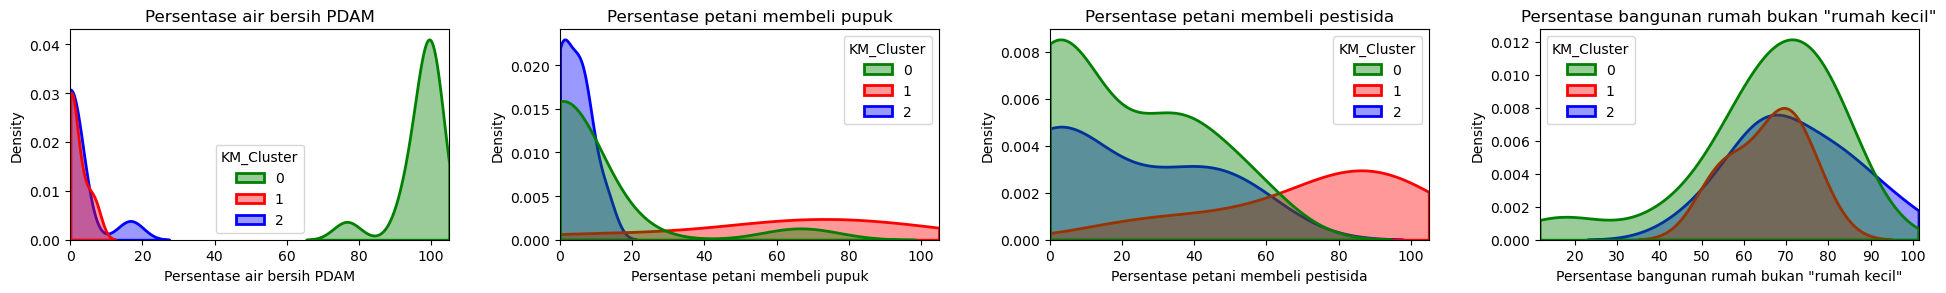

In [412]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np # Import numpy untuk perhitungan

# Asumsi 'rows', 'cols', 'df_pca_coba', dan 'numerical_cols' sudah didefinisikan

cols = 4
rows = 4 # Sesuaikan jumlah baris Anda
fig, axes = plt.subplots(rows, cols, figsize=(20, rows * 3))
axes = axes.flatten()

custom_palette = {0: "green", 1: "red", 2: "blue"}

for i, col in enumerate(numerical_cols):
    if i >= len(axes):
        break
    max_val = df_pca_coba[col].max()
    if max_val < 20:
        x_max = max_val + 2
    else:
        x_max = max_val * 1.05
        
    x_min = df_pca_coba[col].min()
    x_min = max(0, x_min - 0.05 * x_max)

    sns.kdeplot(
        data=df_pca_coba,
        x=col,
        hue="KM_Cluster",
        palette=custom_palette,
        hue_order=[0, 1, 2],
        fill=True,
        alpha=0.4,
        linewidth=2,
        ax=axes[i],
        # Ganti 'clip' dengan batas dinamis:
        clip=(x_min, x_max) 
    )
    
    # --- ATUR BATAS PLOT SECARA DINAMIS ---
    # Ganti 'axes[i].set_xlim(0, 100)' dengan ini:
    axes[i].set_xlim(x_min, x_max)
    
    axes[i].set_title(f"{col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Density")

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout(pad=3)
plt.show()

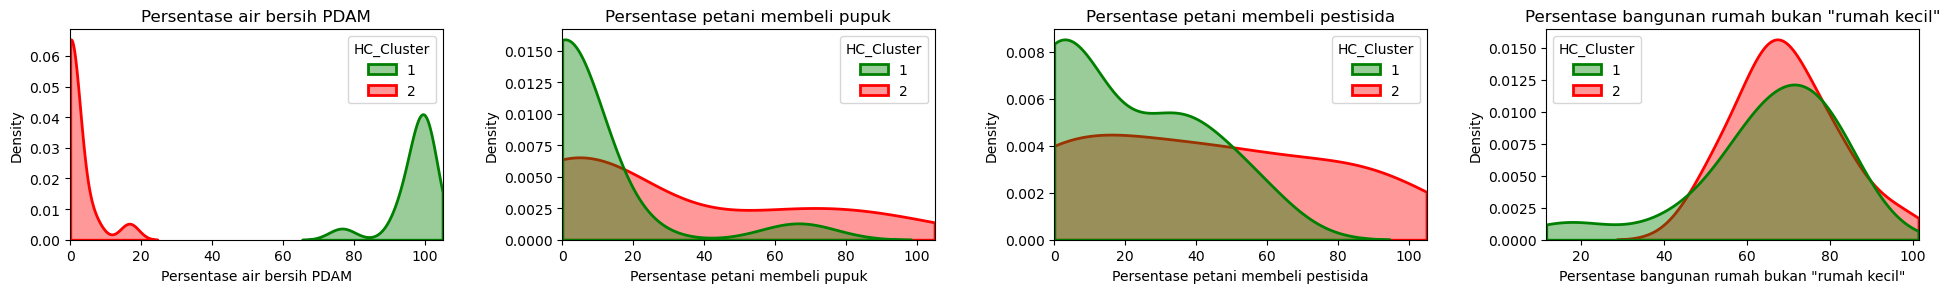

In [413]:
cols = 4 
fig, axes = plt.subplots(rows, cols, figsize=(20, rows * 3))
axes = axes.flatten()

custom_palette = {1: "green", 2: "red"} 

for i, col in enumerate(numerical_cols):
    if i >= len(axes):
        break
    max_val = df_pca_coba[col].max()
    if max_val < 20:
        x_max = max_val + 2
    else:
        x_max = max_val * 1.05
        
    x_min = df_pca_coba[col].min()
    x_min = max(0, x_min - 0.05 * x_max)
    
    sns.kdeplot(
        data=df_pca_coba,
        x=col,
        hue="HC_Cluster",
        palette=custom_palette,
        hue_order=[1, 2],
        fill=True,
        alpha=0.4,
        linewidth=2,
        ax=axes[i],
        clip=(x_min, x_max) 
    )
    axes[i].set_xlim(x_min, x_max) 
    axes[i].set_title(f"{col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Density")

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout(pad=3)
plt.show()

C:\Users\halid\AppData\Local\Temp\ipykernel_19268\1332668371.py:19: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(
C:\Users\halid\AppData\Local\Temp\ipykernel_19268\1332668371.py:19: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(
C:\Users\halid\AppData\Local\Temp\ipykernel_19268\1332668371.py:19: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(


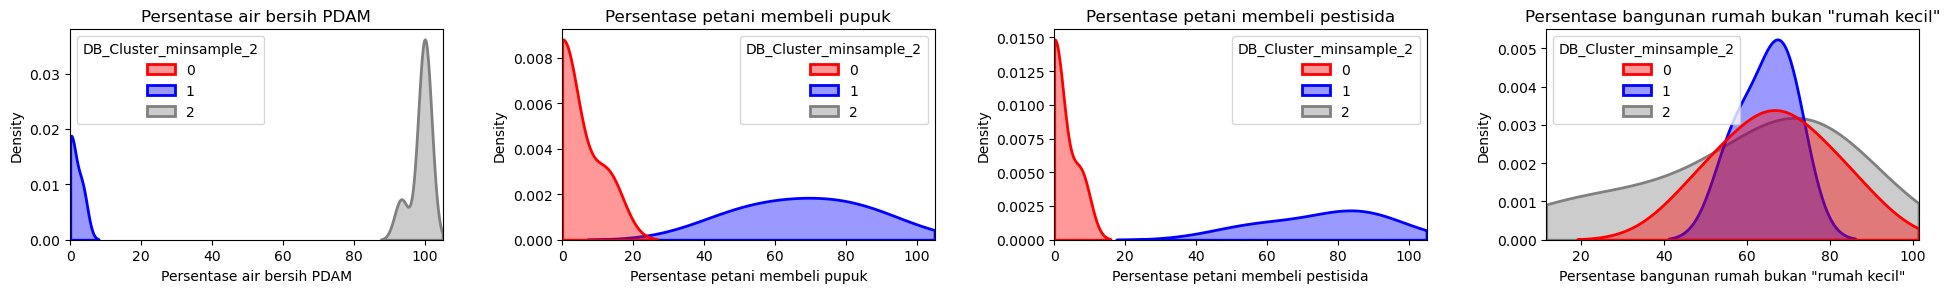

In [414]:
cols = 4 
fig, axes = plt.subplots(rows, cols, figsize=(20, rows * 3))
axes = axes.flatten()

custom_palette = {0: "red", 1: "blue", 2: "grey"} 

for i, col in enumerate(numerical_cols):
    if i >= len(axes):
        break
    max_val = df_pca_coba[col].max()
    if max_val < 20:
        x_max = max_val + 2
    else:
        x_max = max_val * 1.05
        
    x_min = df_pca_coba[col].min()
    x_min = max(0, x_min - 0.05 * x_max)
    
    sns.kdeplot(
        data=df_pca_coba,
        x=col,
        hue="DB_Cluster_minsample_2",
        palette=custom_palette,
        hue_order=[0, 1, 2],
        fill=True,
        alpha=0.4,
        linewidth=2,
        ax=axes[i],
        clip=(x_min, x_max) 
    )
    axes[i].set_xlim(x_min, x_max) 
    axes[i].set_title(f"{col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Density")

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout(pad=3)
plt.show()

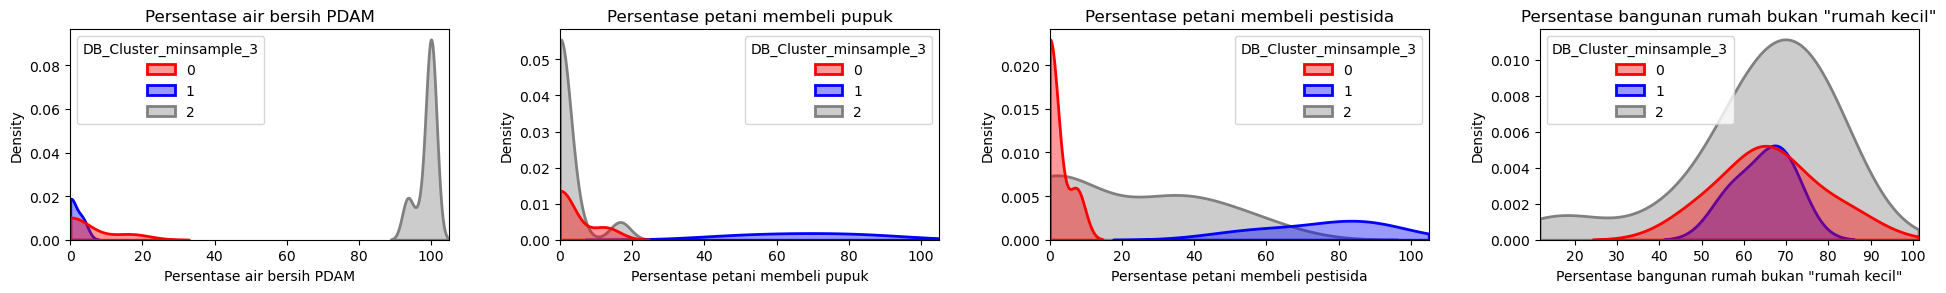

In [415]:
cols = 4 
fig, axes = plt.subplots(rows, cols, figsize=(20, rows * 3))
axes = axes.flatten()

custom_palette = {0: "red", 1: "blue", 2: "grey"} 

for i, col in enumerate(numerical_cols):
    if i >= len(axes):
        break
    max_val = df_pca_coba[col].max()
    if max_val < 20:
        x_max = max_val + 2
    else:
        x_max = max_val * 1.05
        
    x_min = df_pca_coba[col].min()
    x_min = max(0, x_min - 0.05 * x_max)
    
    sns.kdeplot(
        data=df_pca_coba,
        x=col,
        hue="DB_Cluster_minsample_3",
        palette=custom_palette,
        hue_order=[0, 1, 2],
        fill=True,
        alpha=0.4,
        linewidth=2,
        ax=axes[i],
        clip=(x_min, x_max) 
    )
    axes[i].set_xlim(x_min, x_max) 
    axes[i].set_title(f"{col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Density")

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout(pad=3)
plt.show()

# save

In [416]:
df_plot['Desa'] = df_plot['Desa'].replace({'Benihading': 'Benihading I'})
df_plot['Desa'] = df_plot['Desa'].replace({'Mahal': 'Mahal I'})
df_plot['Desa'] = df_plot['Desa'].replace({'Tubuk Rajan': 'Tubukrajan'})
df_plot['Desa'] = df_plot['Desa'].replace({'Tubungwalang': 'Tubung Walang'})

df_pca_coba['Desa'] = df_pca_coba['Desa'].replace({'Benihading': 'Benihading I'})
df_pca_coba['Desa'] = df_pca_coba['Desa'].replace({'Mahal': 'Mahal I'})
df_pca_coba['Desa'] = df_pca_coba['Desa'].replace({'Tubuk Rajan': 'Tubukrajan'})
df_pca_coba['Desa'] = df_pca_coba['Desa'].replace({'Tubungwalang': 'Tubung Walang'})

In [417]:
#df_plot.to_csv("df_plot.csv", index=False)

In [418]:
#df_pca_coba.to_csv("df_pca.csv", index=False)

In [419]:
mean_diff = (
    df_plot.groupby("DB_Cluster_minsample_2")
    .mean(numeric_only=True)
    .diff()
    .abs()
    .iloc[-1]
    .sort_values(ascending=False)
)

mean_diff


Persentase air bersih PDAM                       97.623380
Persentase petani membeli pupuk                  71.300167
Persentase petani membeli pestisida              70.752348
DB_Cluster_minsample_3                            2.769231
Persentase bangunan rumah bukan "rumah kecil"     0.963198
Name: 2, dtype: float64

In [420]:
df_plot

,Persentase air bersih PDAM,Persentase petani membeli pupuk,Persentase petani membeli pestisida,"Persentase bangunan rumah bukan ""rumah kecil""",Desa,KM_Cluster,HC_Cluster,DB_Cluster_minsample_2,DB_Cluster_minsample_3
0,76.666667,66.666667,11.111111,80.000000,Balauring,0,1,-1,-1
1,0.000000,0.000000,7.407407,50.000000,Benihading I,1,2,0,0
2,0.000000,50.000000,83.333333,57.142857,Bour,2,2,1,-1
3,0.000000,0.000000,0.000000,66.666667,Dikesare,1,2,0,0
4,100.000000,0.000000,0.000000,80.000000,Duawutun,0,1,2,1
5,16.666667,0.000000,0.000000,63.333333,Dulitukan,1,2,0,0
6,0.000000,85.714286,57.142857,70.000000,Hoelea I,2,2,-1,-1
7,0.000000,7.142857,53.571429,76.666667,Ile Kimok,1,2,0,2
8,0.000000,100.000000,100.000000,70.000000,Kalikur,2,2,1,-1
9,100.000000,0.000000,33.333333,70.967742,Katakeja,0,1,2,3


# silhouette score

In [421]:
def calculate_silhouette_score_dbscan(X, labels):
    valid_indices = labels != -1
    valid_X = X[valid_indices]
    valid_labels = labels[valid_indices]

    unique_clusters = np.unique(valid_labels)
    # Skor siluet hanya dapat dihitung jika ada minimal 2 klaster
    if len(unique_clusters) < 2:
        return f"Tidak Dapat Dihitung ({len(unique_clusters)} Klaster Valid)"
    else:
        score = silhouette_score(valid_X, valid_labels)
        return f"{score:.4f}"

results = []

In [422]:
results.append(["K-Means", "Data Asli", f"{silhouette_score(df_num_normalized, kmeans_labels_original):.4f}"])
results.append(["Hierarchical", "Data Asli", f"{silhouette_score(df_num_normalized, hc_labels_original):.4f}"])
results.append(["DBSCAN", "Data Asli minsample 2", calculate_silhouette_score_dbscan(df_num_normalized, dbscan_labels_original_2)])
results.append(["DBSCAN", "Data Asli minsample 3", calculate_silhouette_score_dbscan(df_num_normalized, dbscan_labels_original_3)])


results.append(["K-Means", "PCA Terlebih Dahulu", f"{silhouette_score(df_pca, kmeans_labels_pca):.4f}"])
results.append(["Hierarchical", "PCA Terlebih Dahulu", f"{silhouette_score(df_pca, hc_labels_pca):.4f}"])
results.append(["DBSCAN", "PCA Terlebih Dahulu minsample 2", calculate_silhouette_score_dbscan(df_pca, dbscan_labels_pca_2)])
results.append(["DBSCAN", "PCA Terlebih Dahulu minsample 3", calculate_silhouette_score_dbscan(df_pca, dbscan_labels_pca_3)])

In [423]:
df_results = pd.DataFrame(results, columns=["Algoritma", "Tipe Data", "Skor Siluet"])

In [424]:
print("\n--- Hasil Perhitungan Silhouette Score ---\n")
print(df_results.to_markdown(index=False, numalign="left", stralign="left"))


--- Hasil Perhitungan Silhouette Score ---

| Algoritma    | Tipe Data                       | Skor Siluet   |
|:-------------|:--------------------------------|:--------------|
| K-Means      | Data Asli                       | 0.5157        |
| Hierarchical | Data Asli                       | 0.5079        |
| DBSCAN       | Data Asli minsample 2           | 0.5776        |
| DBSCAN       | Data Asli minsample 3           | 0.4838        |
| K-Means      | PCA Terlebih Dahulu             | 0.6737        |
| Hierarchical | PCA Terlebih Dahulu             | 0.6367        |
| DBSCAN       | PCA Terlebih Dahulu minsample 2 | 0.7116        |
| DBSCAN       | PCA Terlebih Dahulu minsample 3 | 0.6869        |
